Aseta laskukone käyttämään GPU:ta, koska muuten konvoluutioneuroverkkojen kouluttaminen on hidasta.


Runtime/Change runtime type/Hardware accelerator: GPU

Suorituspalvelu/Muuta suorituspalvelun tyyppiä/Laitteistokiihdytin: GPU

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Konvoluutioneuroverkot (Convolutional Neural Networks, CNN)**

[DeepLearningAI: Convolutional Neural Networks](https://www.youtube.com/watch?v=ArPaAX_PhIs&list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF)

https://www.v7labs.com/blog/convolutional-neural-networks-guide

F. Chollet: Deep Learning with Python, 2nd ed, Manning  



 ovat  kuvadatan luokitteluun kehitettyjä neuroverkkoja. Niiden kertoimet ovat (yleensä pieniä, 3x3, 5x5) matriiseja eli filttereitä (filter, kernel), joiden tarkoituksena on etsiä kuvista "muotoja". 

 

Perusoperaationa on (isomman) matriisin ja (pienemmän) filtterin konvoluutio (convolution). Konvoluution tuloksena on matriisi, jonka alkiot
saadaan seuraavasti:

"Liikutetaan" filtteriä isomman matriisin päällä,  kerrotaan alkioittain filtteri ja sen alle jäävä osa matriisia, ja lasketaan tulot yhteen. 






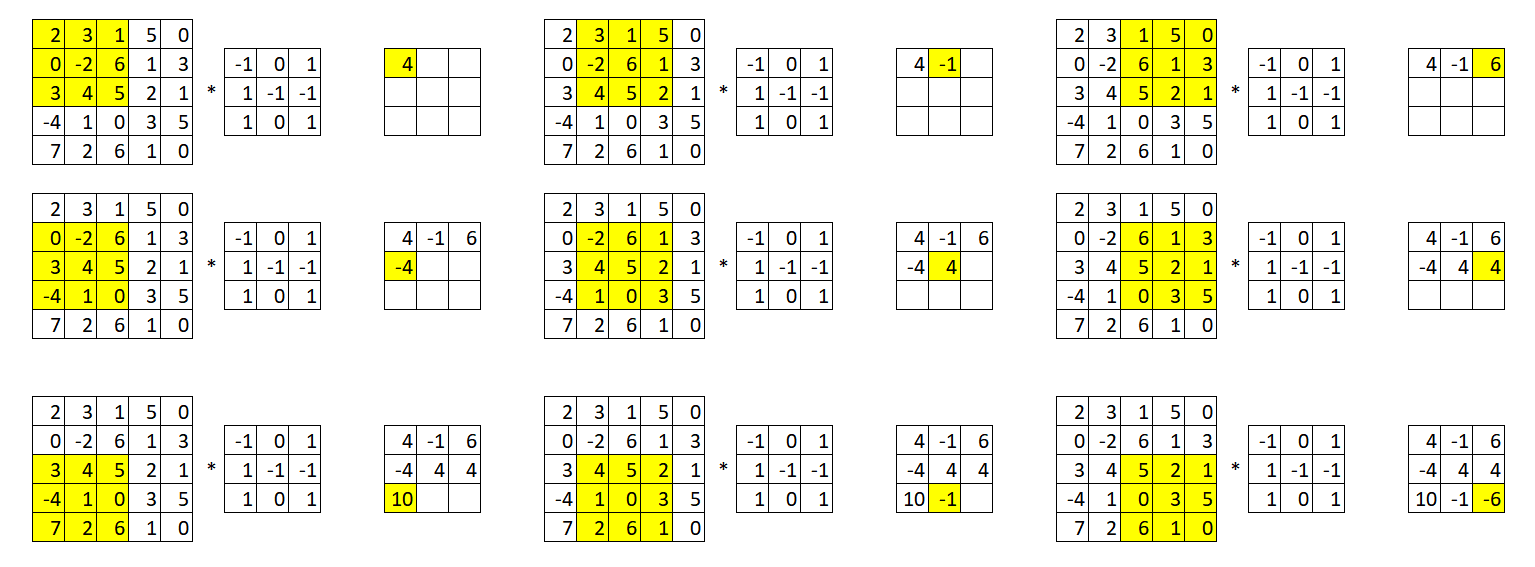

Esimerkiksi, jos kuvamatriisin alkiot ovat välillä 0...1 (0 = musta, 1 = valkea), niin allaolevilla filttereillä "etsitään" päällekkäisiä, vierekkäisiä tai 45 asteen kulmassa olevia kolmen valkoisen pikselin kokoelmia.

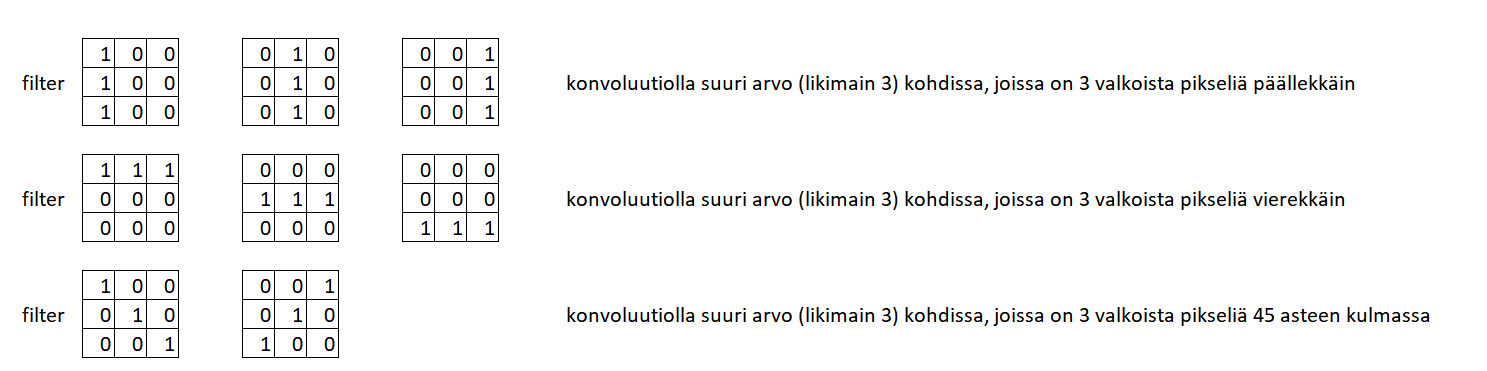

In [ ]:
#ladataan mnist-data 
from tensorflow.keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
print(xtrain.shape)
print(xtest.shape)

# skaalataan arvot välille 0...1
xtrain = xtrain/255.0 
xtest = xtest/255.0



11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(10000, 28, 28)


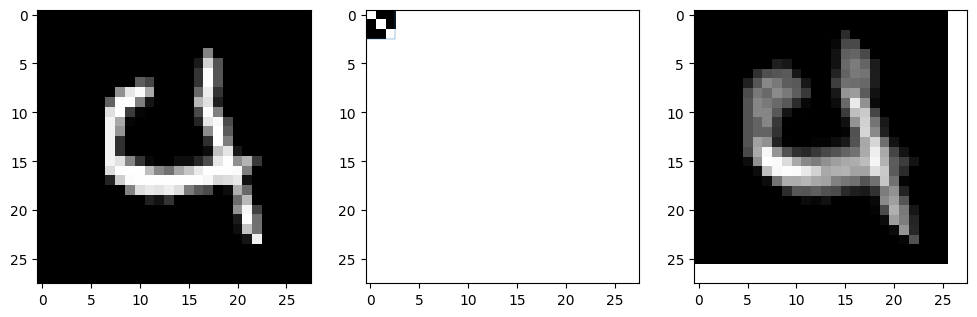

In [ ]:
#konvoluutio
#kuva
k=np.random.randint(0,60000)
xk=xtrain[k]

#filtteri, nxn-matriisi
n=3

f=np.zeros((n,n))

#etsittävä muoto

#f[:,1]=1 #3 valkoista pikseliä päällekkäin

#f[1,:]=1 #3 valkoista pikseliä vierekkäin

#kolme valkoista 45 asteen kulmassa
f[0,0]=1
f[1,1]=1
f[2,2]=1


#konvoluution tulos
xkf=np.zeros((28-n+1,28-n+1))
for r in range(28-n+1):
  for s in range(28-n+1):
    xkf[r,s]=np.sum(xk[r:r+n,s:s+n]*f)

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(xk,cmap='gray')
plt.xlim([-0.5,27.5])
plt.ylim([27.5,-0.5])
plt.subplot(1,3,2)
plt.imshow(f,cmap='gray')
plt.plot([-0.5,n-0.5,n-0.5,-0.5,-0.5],[-0.5,-0.5,n-0.5,n-0.5,-0.5],lw=0.3)
plt.xlim([-0.5,27.5,])
plt.ylim([27.5,-0.5])

plt.subplot(1,3,3)
plt.imshow(xkf,cmap='gray')
plt.xlim([-0.5,27.5,])
plt.ylim([27.5,-0.5])
plt.show()

In [ ]:
np.set_printoptions(linewidth=450,precision=2) 
xk


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.52, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.83,

In [ ]:
xkf

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.52, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.83, 0.84, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.21, 1.09, 1.16, 0.84, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.36, 0.27, 0.  , 0.  , 0.  , 0.  , 0.21, 1.2 , 1.43, 1.16, 0.33, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.

**Padding**

Yllä  3x3-filtterin konvoluutio 5x5-matriisin kanssa oli 3x3-matriisi,
ja 28x28-matriisin kanssa 26x26-matriisi, eli pienempi kuin alkuperäinen matriisi (ns. valid padding).

Jos ei haluta matriisin koon muuttuvan, lisätään sen reunoille nollia ennen konvoluution laskemista (ns. same padding).

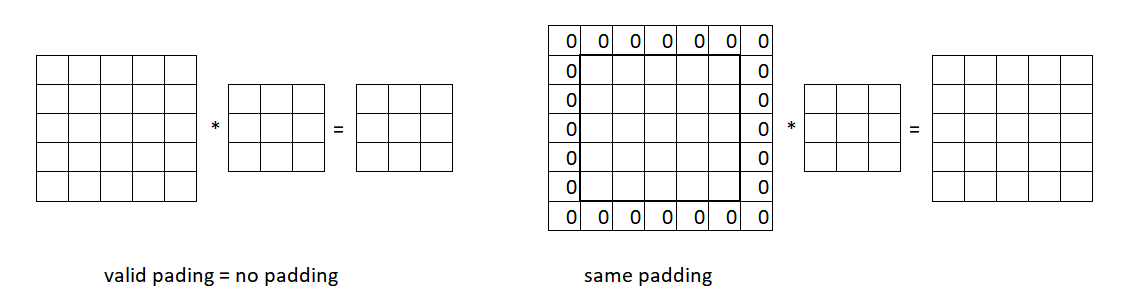

**Pooling**


 Pienennetään konvoluution tuloksena saatavan matriisin kokoa korvaamalla esimerkiksi sen 2x2-osat niiden maksimilla (ns. max-pooling).

 





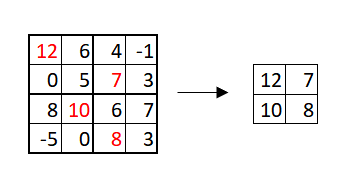

Konvoluutioneuroverkon rakenne on yleensä sellainen, että siinä vuorottevat konvoluutio- ja max-pooling-kerrokset. 
Yleinen periaate konvoluutiokerroksissa on, että matriisien koko pienenee, mutta niiden määrä (syvyys) kasvaa. 
Kun matriisien koko on pienentynyt tarpeeksi, niiden alkioista muodostetaan 1D-vektori ja lisätään loppuun normaali (tiheä, fully connected) neuroverkko, jossa on yksi tai useampia piilokerroksia, ja output-kerros lopulliseen luokitteluun.

Ensimmäinen konvoluutiokerros "etsii" kuvista yksinkertaisia muotoja, esimerkiksi kolmea vierekkäistä valkoista pikseliä.
Seuraava konvoluutiokerros "etsii" näiden yksinkertaisten muotojen muodostamia monimutkaisempia muotoja, esimerkiksi ympyröitä, neliöitä jne. 
Sitä seuraava taas näiden muodostamia, edelleen monimutkaisempia muotoja jne.

Konvoluutiokerrosten tarkoituksena on "suodattaa" kuvan pikseliarvoista oleellinen informaatio (eli kuvassa esiintyvät "muodot"), eli konvoluutiokerrosten tuloksena syntyvän 1D-vektorin alkiot ovat kuvalle  "paremmat koordinaatit" kuin alkuperäiset pikseliarvot.





## **MNIST** 

Konvoluutioneuroverkko MNIST-kuvien luokittelemiseksi

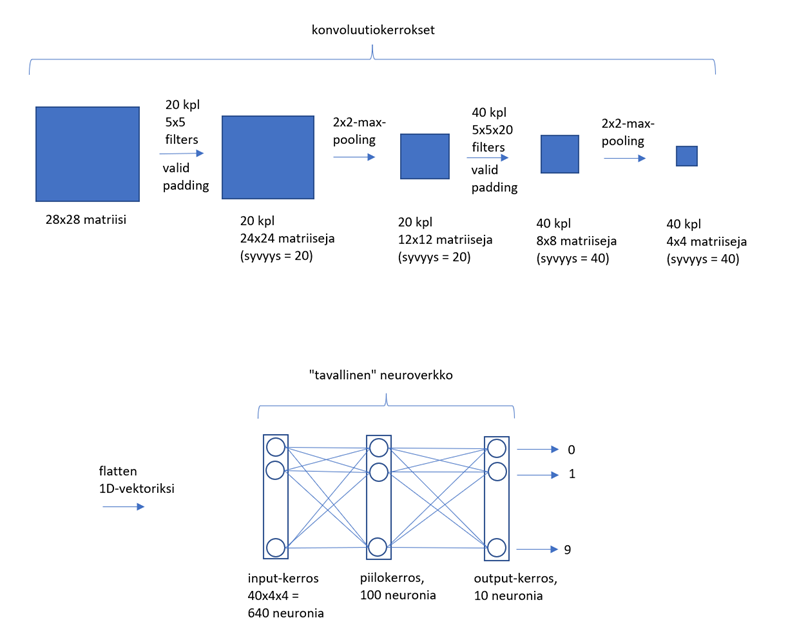

Esimerkiksi, toisessa konvoluutiokerroksessa käytetään 5x5x20-filttereitä, 
eli 20:n 5x5-filtterin kokoelmia.
Näillä kerrotaan edeltävän max-pooling-kerroksen 12x12x20 matriiseja niin, että
kullakin 5x5-matriisilla kerrotaan sama 5x5-osa samalla syvyydellä olevasta 12x12-matriisista, ja kaikki
tulot lasketaan yhteen.

Jokaisella 5x5x20-filtterillä on lisäksi vakiotermi, joka lisätään tulojen summaan ja tuloksesta lasketaan aktivaatiofunktion (esimerkiksi relu) arvo, joka on konvoluution tuloksena saatavan 8x8-matriisin alkio. 




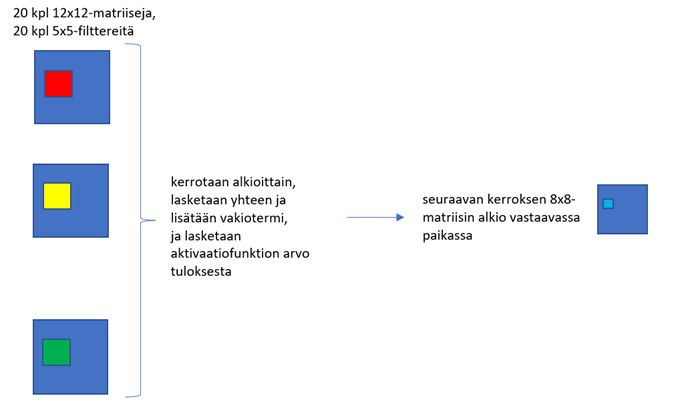

Filttereiden alkiot ja vakiotermit etsitään training-datan avulla minimoimalla kustannusfunktio (gradient descent). 

In [ ]:
#rakennetaan ylläoleva konvoluutio-neuroverkko Tensorflow-Kerasilla
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
n1=20 #ensimmäisen konvoluutiokerroksen filttereiden määrä 
n2=40 #toisen konvoluutiokerroksen filttereiden määrä 
n3=100 #loppuosan tavallisen neuroverkon piilokerroksen neuronien määrä 
model = Sequential()   
model.add(Conv2D(filters=n1, kernel_size=5, activation='relu',input_shape=(28,28,1)))
#oletuksena: padding="valid" (padding='same' -> same padding)  
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=n2, kernel_size=5,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.5)) 
model.add(Dense(n3,activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 40)          20040     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 40)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 640)               0         
                                                                 
 dropout (Dropout)           (None, 640)               0

In [ ]:
#valitaan optimointimenetelmä ja kustannusfunktio
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#tallennetaan parhaan testitarkkuden antavat kertoimet
from tensorflow.keras.callbacks import ModelCheckpoint

callback = ModelCheckpoint(
    filepath='mnist_cnn_weights.hdf5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

In [ ]:
#muunnetaan kuvat 3D-arrayksi kokoon (28,28,1)
xtrain=xtrain.reshape((60000,28,28,1))
xtest=xtest.reshape((10000,28,28,1))

In [ ]:
#koulutetaan verkko eli minimoidaan kustannusfunktiota
history=model.fit(xtrain,ytrain,
                  epochs=100,batch_size=1000, 
                  validation_data=(xtest,ytest),
                  callbacks=[callback])

Epoch 1/100
60/60 [==============================] - ETA: 0s - loss: 1.1069 - accuracy: 0.6352
Epoch 1: val_accuracy improved from -inf to 0.93840, saving model to mnist_cnn_weights.hdf5
60/60 [==============================] - 12s 16ms/step - loss: 1.1069 - accuracy: 0.6352 - val_loss: 0.2130 - val_accuracy: 0.9384
Epoch 2/100
55/60 [==========================>...] - ETA: 0s - loss: 0.3214 - accuracy: 0.9042
Epoch 2: val_accuracy improved from 0.93840 to 0.96490, saving model to mnist_cnn_weights.hdf5
60/60 [==============================] - 1s 11ms/step - loss: 0.3165 - accuracy: 0.9055 - val_loss: 0.1154 - val_accuracy: 0.9649
Epoch 3/100
59/60 [============================>.] - ETA: 0s - loss: 0.2199 - accuracy: 0.9341
Epoch 3: val_accuracy improved from 0.96490 to 0.97380, saving model to mnist_cnn_weights.hdf5
60/60 [==============================] - 1s 11ms/step - loss: 0.2192 - accuracy: 0.9342 - val_loss: 0.0834 - val_accuracy: 0.9738
Epoch 4/100
55/60 [=======================

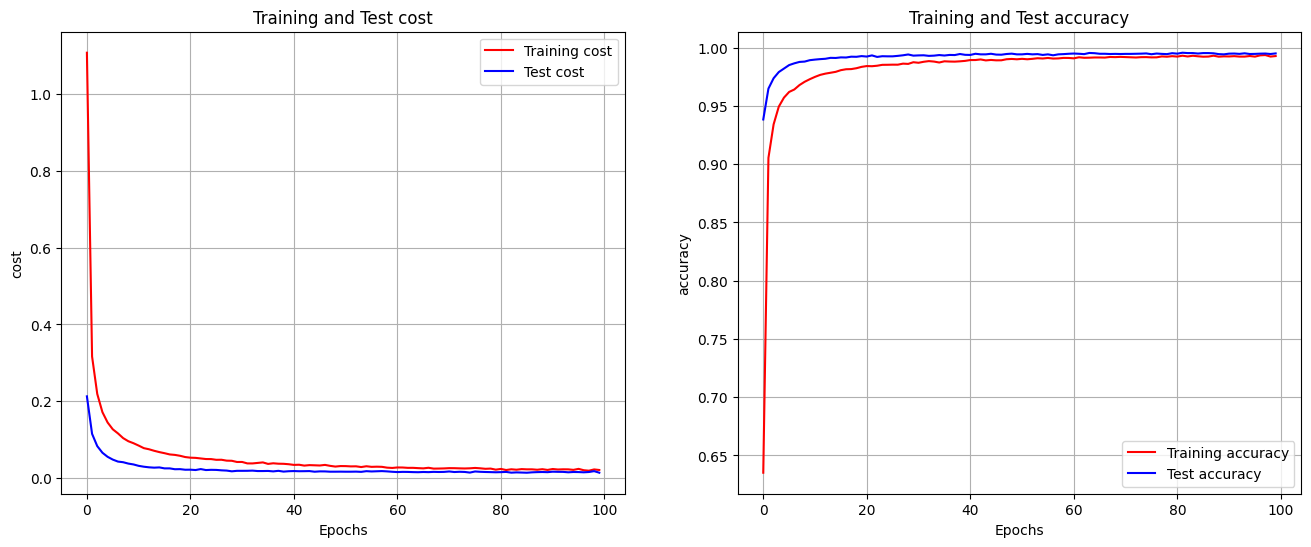

In [ ]:
#kustannusfunktion ja tarkkuuden kuvaajat
train_cost = history.history['loss'] 
test_cost = history.history['val_loss']
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']


plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(train_cost, 'r', label='Training cost')
plt.plot(test_cost, 'b', label='Test cost')
plt.title('Training and Test cost')
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.legend()
plt.grid()


plt.subplot(1,2,2)
plt.plot(train_acc, 'r', label='Training accuracy')
plt.plot(test_acc, 'b', label='Test accuracy')
plt.title('Training and Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#ladataan parhaan testi-tarkkuuden antavat kertoimet
model.load_weights('mnist_cnn_weights.hdf5')

model.evaluate(xtrain,ytrain)
model.evaluate(xtest,ytest)


313/313 [==============================] - 1s 4ms/step - loss: 0.0163 - accuracy: 0.9957


[0.016311505809426308, 0.9957000017166138]

In [ ]:
#tallennetaan koko malli driveen
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/mnist_cnn.h5')

In [ ]:
#tallennetun mallin lataaminen: 
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/mnist_cnn.h5')
model.evaluate(xtrain,ytrain)
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.0163 - accuracy: 0.9957


[0.01631164364516735, 0.9957000017166138]

In [ ]:
at=model.predict(xtest) #testikuvien ennustetut todennäköisyydet
ytest_pred=np.argmax(at,axis=1) #ja luokat

from sklearn.metrics import confusion_matrix
M=confusion_matrix(ytest, ytest_pred)
print(M)
print(np.sum(np.diag(M))) #oikein luokitetujen testikuvien määrä

313/313 [==============================] - 1s 2ms/step
[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   1    0 1027    0    0    0    1    3    0    0]
 [   0    0    0 1009    0    1    0    0    0    0]
 [   0    0    0    0  981    0    0    0    0    1]
 [   0    0    0    5    0  884    1    1    0    1]
 [   1    2    0    0    1    1  952    0    1    0]
 [   0    2    1    0    0    0    0 1023    1    1]
 [   2    0    0    1    0    0    0    0  970    1]
 [   0    0    0    1    5    1    0    2    2  998]]
9957


(43, 28, 28, 1)


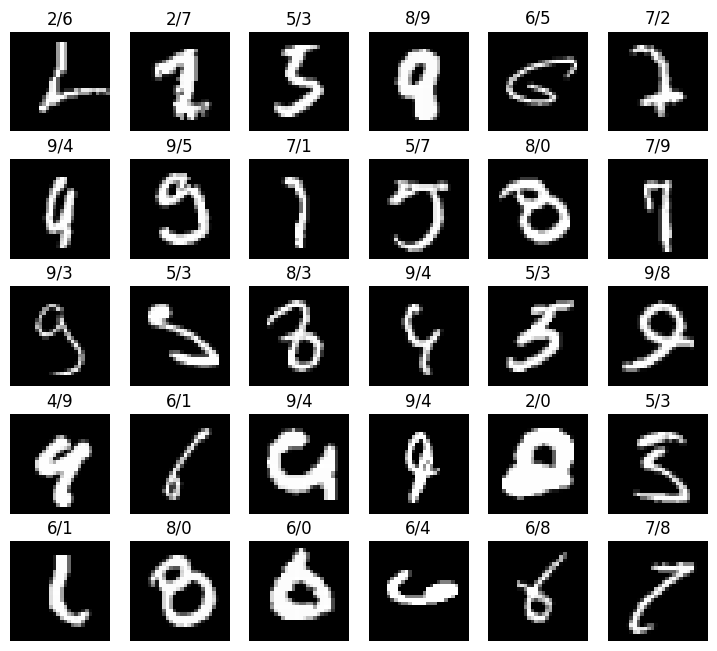

In [ ]:
#30 väärin luokiteltua testikuvaa 
xtest_vaarin=xtest[ytest_pred!=ytest]
print(xtest_vaarin.shape)

ytest_vaarin=ytest[ytest_pred!=ytest]
ytest_vaarin_pred=ytest_pred[ytest_pred!=ytest]

plt.figure(figsize=(9,8))
for k in range(30):
    plt.subplot(5,6,k+1)
    plt.imshow(xtest_vaarin[k,:,:,0],cmap='gray')
    plt.axis('off')
    plt.title(str(ytest_vaarin[k]) + '/' + str(ytest_vaarin_pred[k]))

In [ ]:
#kertoimet
kertoimet=model.get_weights()
print(kertoimet[0].shape) #conv1-kerroksen filtterit
print(kertoimet[1].shape) #ja niiden vakiotermit
print(kertoimet[2].shape) #conv2-kerroksen filtterit 
print(kertoimet[3].shape) #ja niiden vakiotermit
print(kertoimet[4].shape) #flatten->dense: W:t
print(kertoimet[5].shape) #flatten->dense: b:t
print(kertoimet[6].shape) #dense->output: W:t
print(kertoimet[7].shape) #dense->output: b:t


(5, 5, 1, 20)
(20,)
(5, 5, 20, 40)
(40,)
(640, 100)
(100,)
(100, 10)
(10,)


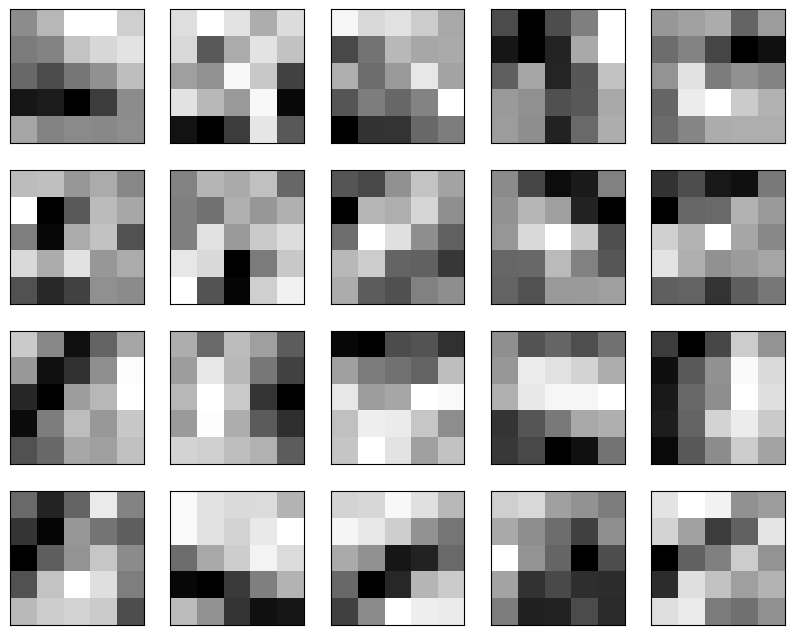

[[-0.063  0.077  0.314  0.313  0.156]
 [-0.118 -0.091  0.118  0.181  0.22 ]
 [-0.18  -0.274 -0.136 -0.045  0.102]
 [-0.447 -0.43  -0.52  -0.324 -0.063]
 [ 0.02  -0.09  -0.068 -0.076 -0.06 ]]


In [ ]:
#conv 1-kerroksen filtterit kuvina (valk=max, musta = min) 
np.set_printoptions(precision=3)

plt.figure(figsize=(10,8))
for k in range(20):
  wk=kertoimet[0][:,:,0,k]
  plt.subplot(4,5,k+1)
  plt.imshow(wk,cmap='gray')
  plt.xticks([],[])
  plt.yticks([],[])
plt.show()

k=0
Wk=kertoimet[0][:,:,0,k]
print(Wk)  

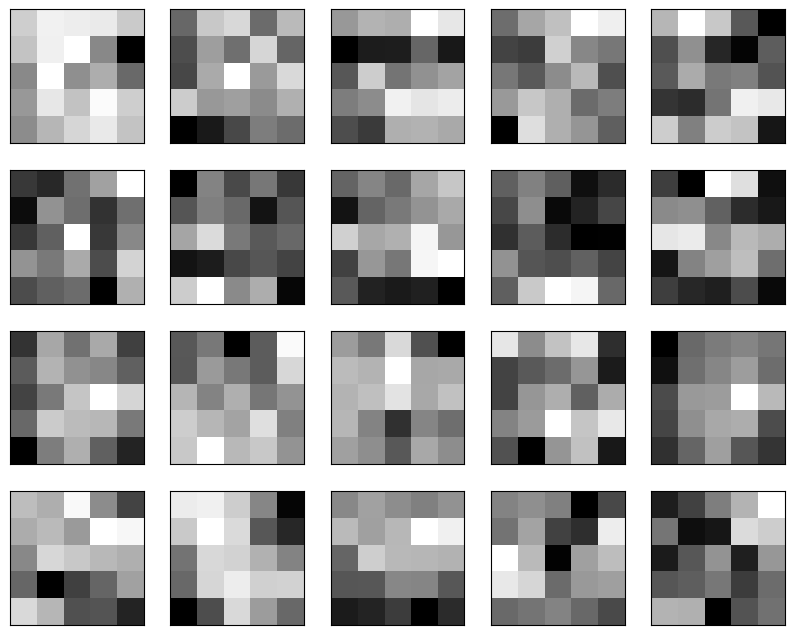

In [ ]:
#conv2-kerroksen filtterit kuvina
m=0 #5x5x20-filterin numero, 0...39
plt.figure(figsize=(10,8))
for k in range(20):
  wk=kertoimet[2][:,:,k,m] 
  plt.subplot(4,5,k+1)
  plt.imshow(wk,cmap='gray')
  plt.xticks([],[])
  plt.yticks([],[])

1/1 [==============================] - 0s 18ms/step


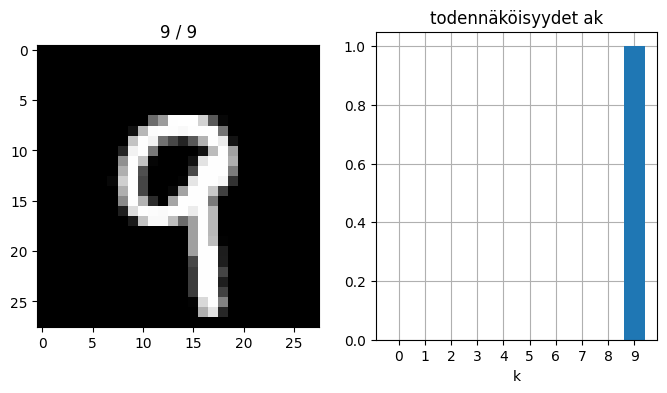

In [ ]:
#testikuva
k=np.random.randint(10000)
xt=xtest[k].reshape((1,28,28,1))
yt=ytest[k]
at=model.predict(xt) #todennäköisyydet
yt_pred=np.argmax(at) #luokka

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)   
plt.imshow(xt.reshape((28,28)),cmap='gray')   
plt.title(str(yt)+' / '+str(yt_pred)) 
plt.subplot(1,2,2)
plt.bar(np.linspace(0,9,10),at.reshape((10,)),zorder=2)
plt.grid()
plt.xticks(np.linspace(0,9,10))
plt.xlabel('k')
plt.title('todennäköisyydet ak')
plt.show()


In [ ]:
#kerrosten aktivaatiot eli konvoluutio- ja max-pool-kerrosten tulokset testikuvalle
#min=musta, max=valkea
layer_outputs = [layer.output for layer in model.layers] 
from tensorflow.keras.models import Model
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(xt.reshape((1,28,28,1)))


1/1 [==============================] - 0s 68ms/step


(1, 24, 24, 20)


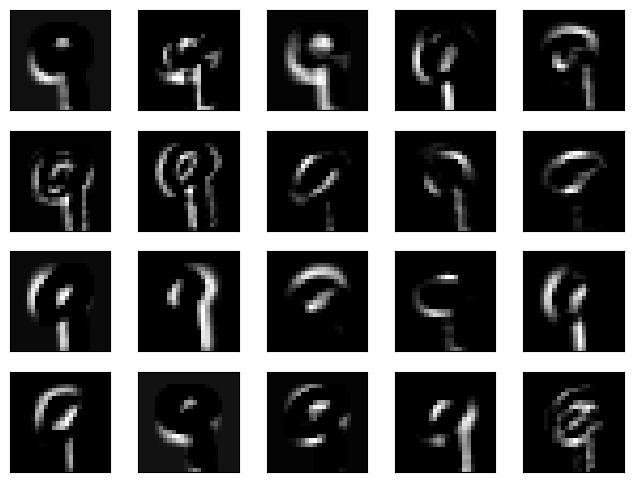

In [ ]:
#conv1
print(activations[0].shape)

plt.figure(figsize=(8,6))
for k in range(20):
    plt.subplot(4,5,k+1)
    plt.imshow(activations[0][0,:,:,k],cmap='gray')
    plt.xticks([],[])
    plt.yticks([],[])

(1, 12, 12, 20)


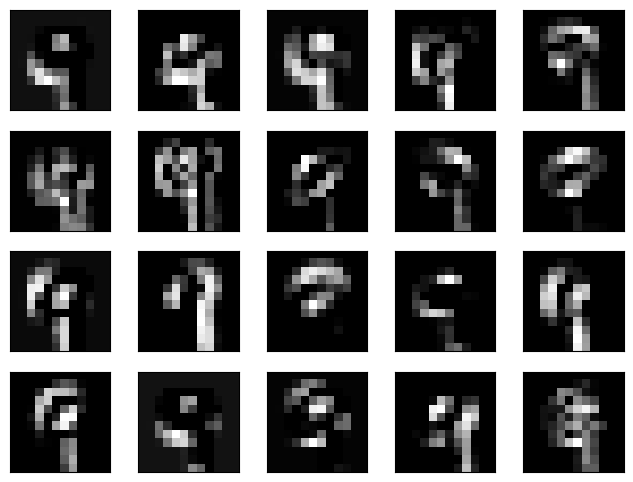

In [ ]:
#max-pooling 1   
print(activations[1].shape)

plt.figure(figsize=(8,6))
for k in range(20):
    plt.subplot(4,5,k+1)
    plt.imshow(activations[1][0,:,:,k],cmap='gray')
    plt.xticks([],[])
    plt.yticks([],[])

(1, 8, 8, 40)


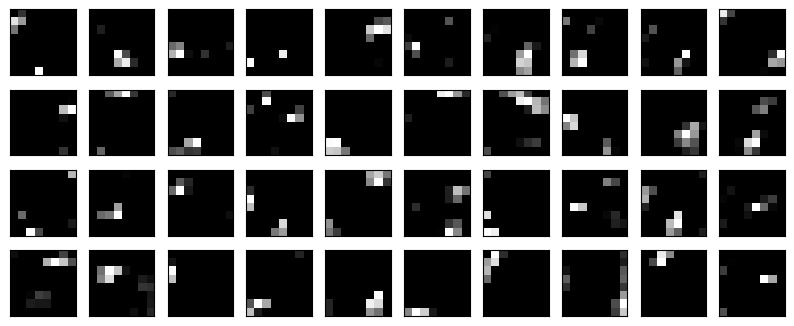

array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.31824878, 0.        , 0.        , 0.        ],
       [0.34110123, 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ]], dtype=float32)

In [ ]:
#conv2
np.set_printoptions(linewidth=1000)
print(activations[2].shape)

plt.figure(figsize=(10,4))
for k in range(40):
    plt.subplot(4,10,k+1)
    plt.imshow(activations[2][0,:,:,k],cmap='gray')
    plt.xticks([],[])
    plt.yticks([],[])
plt.show()
k=3
activations[2][0,:,:,k]    

(1, 4, 4, 40)


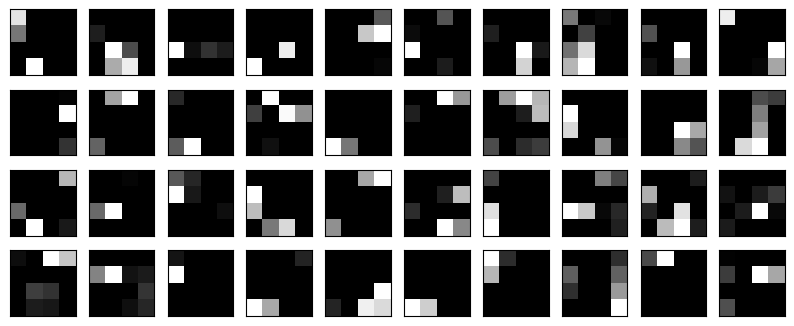

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.31824878, 0.        ],
       [0.34110123, 0.        , 0.        , 0.        ]], dtype=float32)

In [ ]:
#max-pooling 2
print(activations[3].shape)
plt.figure(figsize=(10,4))
for k in range(40):
    plt.subplot(4,10,k+1)
    plt.imshow(activations[3][0,:,:,k],cmap='gray')
    plt.xticks([],[])
    plt.yticks([],[])   
plt.show()
k=3
activations[3][0,:,:,k]        

## **CIFAR10**









[CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) (Canadian Institute For Advanced Research) datajoukko koostuu 60000 32x32-pikselin värikuvasta, jotka esittävät 10 eri luokan olioita:

0: airplane

1: automobile

2: bird

3: cat

4: deer

5: dog

6: frog

7: horse

8: ship

9: truck

In [ ]:
from tensorflow.keras.datasets import cifar10
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()
xtrain = xtrain/255.0 #pikseliarvot välille 0...1, tyypiksi float
xtest = xtest/255.0

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
ytrain=ytrain.reshape(50000) #pystyvektori 1D-vektoriksi
ytest=ytest.reshape(10000) #pystyvektori 1D-vektoriksi

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

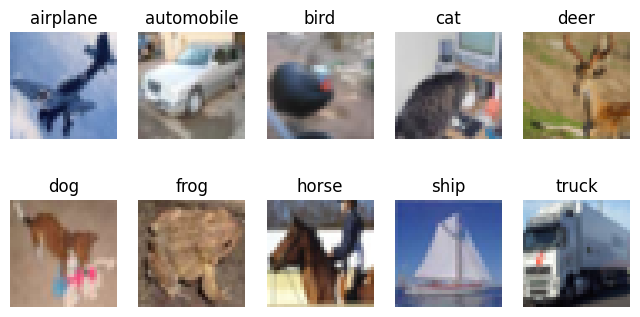

In [ ]:
#esimerkkikuvia

plt.figure(figsize=(8,4))
for i in range(10):
    xi=xtrain[ytrain==i]
    mi=ytrain[ytrain==i].shape
    ki=np.random.randint(mi)    
    plt.subplot(2,5,i+1)
    plt.axis('off')
    plt.imshow(xi[ki[0]])
    plt.title(class_names[i])
plt.show()

Konvoluutioneuroverkko Cifar10-kuvien luokittelemiseksi

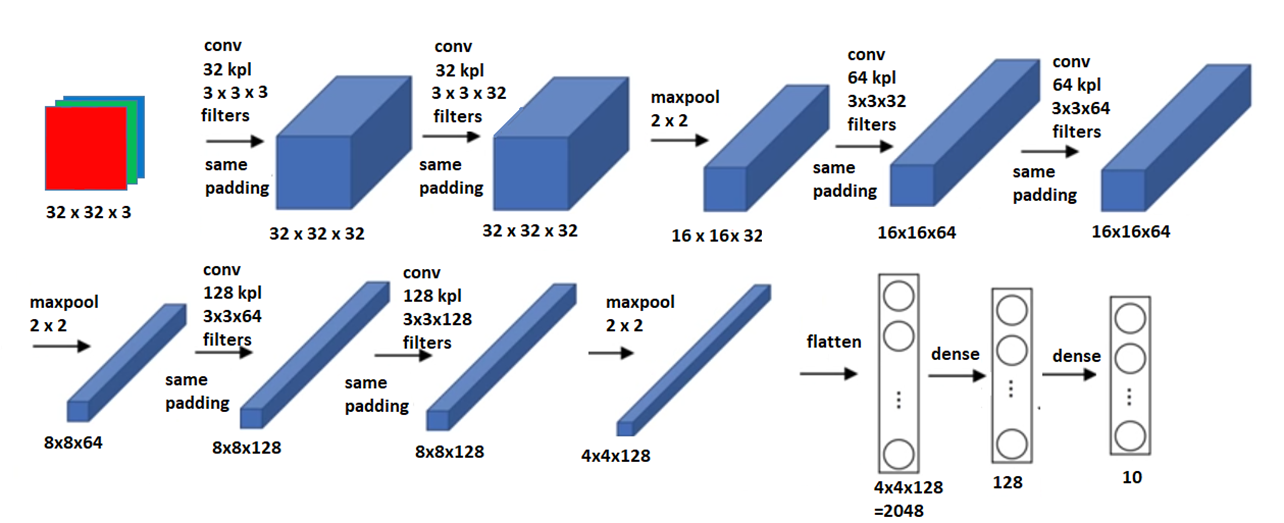

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu',  padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',  padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

callback = ModelCheckpoint(
    filepath='cifar10_weights.hdf5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

In [ ]:
history = model.fit(xtrain, ytrain, epochs=120, batch_size=1000,
                    callbacks=[callback],
                    validation_data=(xtest, ytest))

Epoch 1/120
50/50 [==============================] - ETA: 0s - loss: 2.1282 - accuracy: 0.2027
Epoch 1: val_accuracy improved from -inf to 0.30630, saving model to cifar10_weights.hdf5
50/50 [==============================] - 8s 105ms/step - loss: 2.1282 - accuracy: 0.2027 - val_loss: 1.8931 - val_accuracy: 0.3063
Epoch 2/120
50/50 [==============================] - ETA: 0s - loss: 1.8147 - accuracy: 0.3215
Epoch 2: val_accuracy improved from 0.30630 to 0.39700, saving model to cifar10_weights.hdf5
50/50 [==============================] - 5s 100ms/step - loss: 1.8147 - accuracy: 0.3215 - val_loss: 1.6192 - val_accuracy: 0.3970
Epoch 3/120
50/50 [==============================] - ETA: 0s - loss: 1.6217 - accuracy: 0.4030
Epoch 3: val_accuracy improved from 0.39700 to 0.48380, saving model to cifar10_weights.hdf5
50/50 [==============================] - 5s 95ms/step - loss: 1.6217 - accuracy: 0.4030 - val_loss: 1.4094 - val_accuracy: 0.4838
Epoch 4/120
50/50 [============================

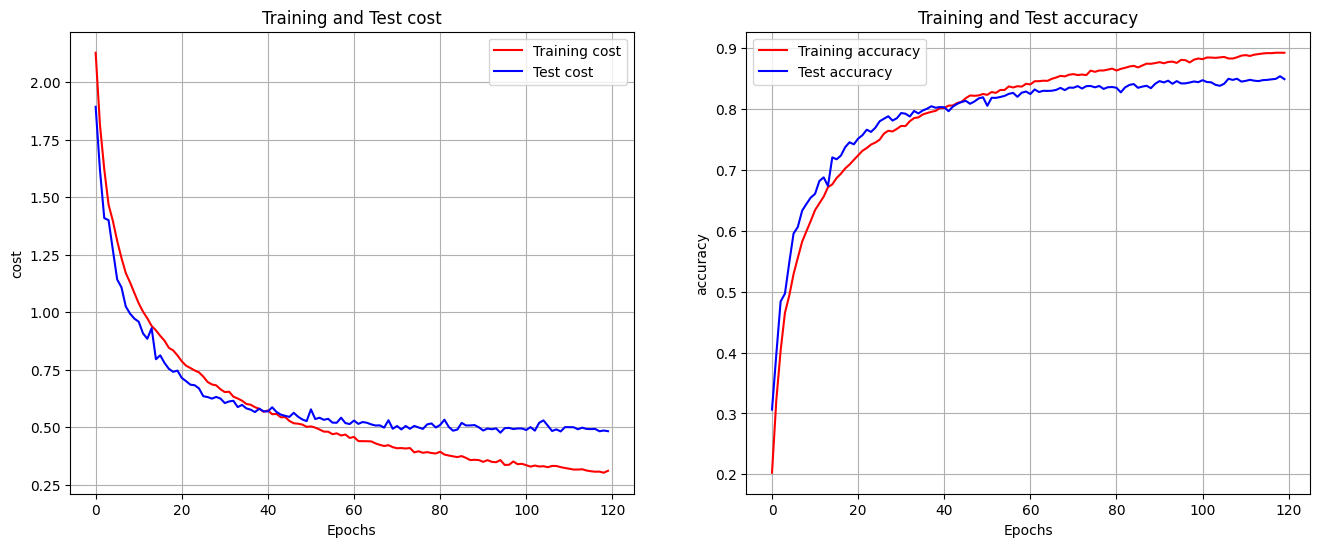

In [ ]:
train_cost = history.history['loss'] 
test_cost = history.history['val_loss']
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']


plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(train_cost, 'r', label='Training cost')
plt.plot(test_cost, 'b', label='Test cost')
plt.title('Training and Test cost')
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(train_acc, 'r', label='Training accuracy')
plt.plot(test_acc, 'b', label='Test accuracy')
plt.title('Training and Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#ladataan parhaat kertoimet
model.load_weights('cifar10_weights.hdf5')

model.evaluate(xtest,ytest)
model.evaluate(xtrain,ytrain)

1563/1563 [==============================] - 6s 4ms/step - loss: 0.0919 - accuracy: 0.9761


[0.09194449335336685, 0.9761000275611877]

In [ ]:
#kiinnitä drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#ja tallenna malli:
model.save('/content/drive/MyDrive/cifar10_cnn.h5')

In [ ]:
#ja lataa myöhemmin 
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/cifar10_cnn.h5')

1/1 [==============================] - 0s 18ms/step


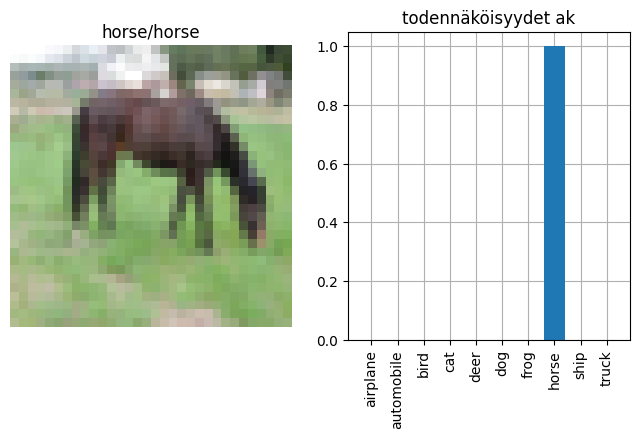

In [ ]:
#testikuva
k=np.random.randint(10000)
xt=xtest[k]
yt=ytest[k]
luokka=class_names[yt]
at=model.predict(xt.reshape(1,32,32,3))
yt=np.argmax(at)
pred_luokka=class_names[yt]

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(xt)
plt.axis('off')
plt.title(str(luokka)+ '/' +str(pred_luokka) )
plt.subplot(1,2,2)
plt.bar(np.linspace(0,9,10),at[0,:],zorder=2)
plt.xticks(np.linspace(0,9,10),labels=class_names,rotation=90)
plt.grid()
plt.title('todennäköisyydet ak')
plt.show()

In [ ]:
atest=model.predict(xtest) #todennäköisyydet
print(atest.shape,'\n')
ytest_pred=np.argmax(atest,axis=1) #luokat
print(ytest_pred.shape,'\n')
from sklearn.metrics import confusion_matrix
M=confusion_matrix(ytest, ytest_pred)
print(class_names,'\n')
print(M,'\n')
print(np.sum(np.diag(M)),'\n') #oikein luokitetujen testikuvien määrä

313/313 [==============================] - 1s 2ms/step
(10000, 10) 

(10000,) 

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 

[[869  10  38  15  10   1   4  12  26  15]
 [  9 934   0   2   1   1   6   0   9  38]
 [ 37   1 759  28  55  46  43  25   2   4]
 [ 11   2  41 686  44 131  50  26   2   7]
 [  6   3  28  33 848  19  30  32   1   0]
 [  4   0  22  86  33 805  12  34   2   2]
 [  4   1  26  32  13   6 908   4   3   3]
 [  4   0  13  18  21  30   2 907   1   4]
 [ 41  17   5   3   1   2   7   3 903  18]
 [ 12  44   3   5   1   1   2   6  10 916]] 

8535 



(1465, 32, 32, 3)


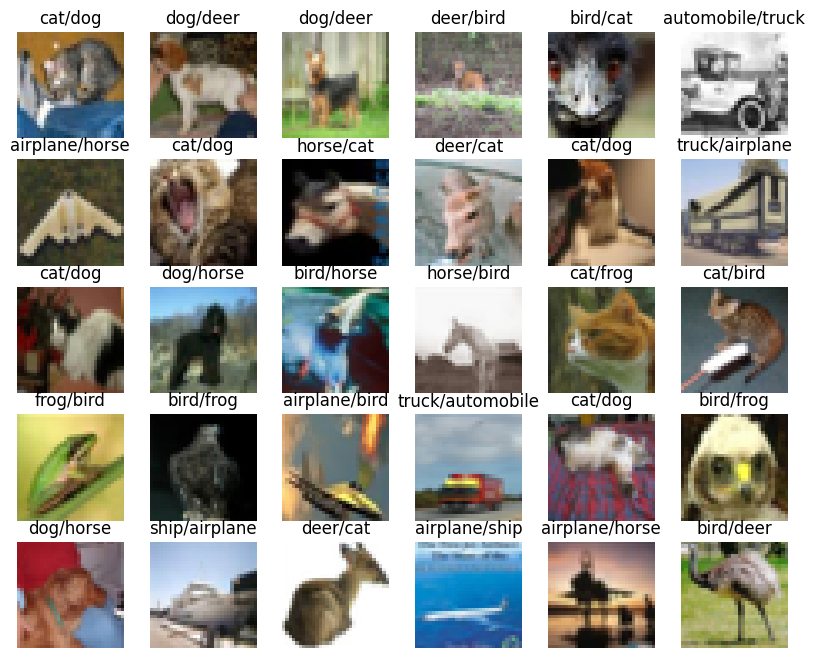

In [ ]:
#30 väärin luokiteltua testikuvaa 
xtest_vaarin=xtest[ytest_pred!=ytest]
print(xtest_vaarin.shape)

ytest_vaarin=ytest[ytest_pred!=ytest]
ytest_vaarin_pred=ytest_pred[ytest_pred!=ytest]
ytest_vaarin.shape
plt.figure(figsize=(10,8))
for k in range(30):
    plt.subplot(5,6,k+1)
    plt.imshow(xtest_vaarin[k])
    plt.axis('off')
    plt.title(class_names[ytest_vaarin[k]] + '/' + class_names[ytest_vaarin_pred[k]])

[Batch Normalization](https://towardsdatascience.com/batch-normalization-in-3-levels-of-understanding-14c2da90a338) on menetelmä, jolla pyritään helpottamaan (konvoluutio)neuroverkkojen kouluttamista. Siinä normalisoidaan kertoimien päivittämiseen käytettyjen training-data-batchien ulostulot konvoluutiokerroksista. 

Esimerkiksi yllä käytetyn verkon ensimmäisen konvoluutiokerroksen ulostulo on 32 kpl 32x32-matriiseja. Normalisoidaan kunkin ulostulo-matriisin alkiot $m_b$:n kokoiselle batchille seuraavasti: 

batch: kuvat $K_1,K_2,...,K_{m_b}$
$\to$ ulostulot $X_1,X_2,...,X_{m_b}$ (32x32-matriiseja) 




$$
X_j\to  Y_j=\frac{X_j-\mu}{\sigma} \to Z_j=\gamma Y_j+\beta
$$

missä $\mu$ ja $\sigma$ ovat  matriisien $X_1,...,X_{m_b}$ alkioiden keskiarvo ja -hajonta, ja kertoimia $\gamma$ ja $\beta$   päivitetään gradient descentillä. 


In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
#ylläoleva verkko batch normalizationilla
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',padding='same',use_bias=False,
          input_shape=(32, 32, 3)))
#use_bias=False: filttereissä ei tarvita vakiotermiä, se tulee BatchNormalizationista (beta)
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same',use_bias=False))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same',use_bias=False))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same',use_bias=False))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same',use_bias=False))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same',use_bias=False))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        864       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9216      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

callback = ModelCheckpoint(
    filepath='cifar10_weights.hdf5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

In [ ]:
history = model.fit(xtrain, ytrain, epochs=120, batch_size=100,
                    callbacks=[callback],
                    validation_data=(xtest, ytest))

Epoch 1/120
499/500 [============================>.] - ETA: 0s - loss: 1.8746 - accuracy: 0.3154
Epoch 1: val_accuracy improved from -inf to 0.33000, saving model to cifar10_weights.hdf5
500/500 [==============================] - 22s 19ms/step - loss: 1.8740 - accuracy: 0.3155 - val_loss: 2.0614 - val_accuracy: 0.3300
Epoch 2/120
499/500 [============================>.] - ETA: 0s - loss: 1.4527 - accuracy: 0.4737
Epoch 2: val_accuracy improved from 0.33000 to 0.54770, saving model to cifar10_weights.hdf5
500/500 [==============================] - 8s 17ms/step - loss: 1.4526 - accuracy: 0.4736 - val_loss: 1.3052 - val_accuracy: 0.5477
Epoch 3/120
499/500 [============================>.] - ETA: 0s - loss: 1.2310 - accuracy: 0.5617
Epoch 3: val_accuracy improved from 0.54770 to 0.58120, saving model to cifar10_weights.hdf5
500/500 [==============================] - 8s 17ms/step - loss: 1.2313 - accuracy: 0.5616 - val_loss: 1.1765 - val_accuracy: 0.5812
Epoch 4/120
499/500 [===============

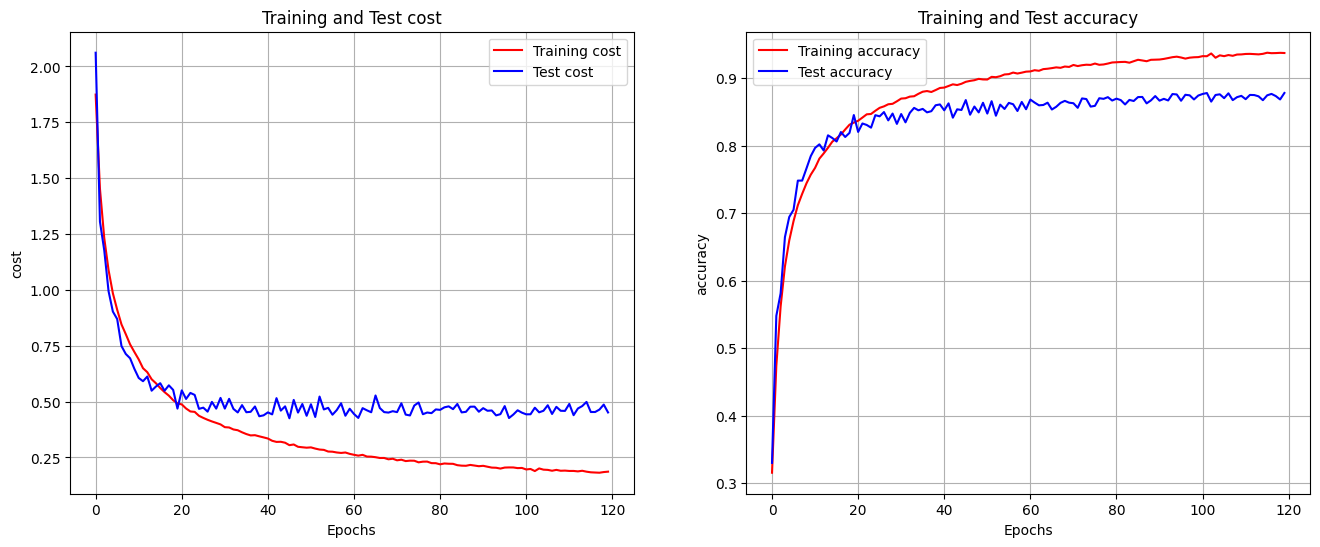

In [ ]:
train_cost = history.history['loss'] 
test_cost = history.history['val_loss']
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']


plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(train_cost, 'r', label='Training cost')
plt.plot(test_cost, 'b', label='Test cost')
plt.title('Training and Test cost')
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(train_acc, 'r', label='Training accuracy')
plt.plot(test_acc, 'b', label='Test accuracy')
plt.title('Training and Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#ladataan parhaat kertoimet
model.load_weights('cifar10_weights.hdf5')

model.evaluate(xtest,ytest)
model.evaluate(xtrain,ytrain)

1563/1563 [==============================] - 6s 4ms/step - loss: 0.0321 - accuracy: 0.9932


[0.03206535056233406, 0.9932000041007996]

In [ ]:
#ja tallenna malli:
model.save('/content/drive/MyDrive/cifar10_cnn_v2.h5')

In [ ]:
#lataa myöhemmin 
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/cifar10_cnn_v2.h5')

In [ ]:
#mallin kerrokset
layers=model.layers
layers

In [ ]:
#Batch Normalizationin kertoimet ensimmäiselle konvoluutiokerrokselle
#kullekin 32x32-matriisille gamma,beta,mu,sigma 
BN1=model.layers[1].get_weights()
BN1

[array([1.0500578 , 0.44796637, 0.69158185, 0.34398267, 1.1255472 ,
        1.159697  , 0.52627987, 0.9843329 , 0.5684883 , 0.9616857 ,
        0.85932744, 0.6391124 , 0.46529058, 1.0418094 , 1.1707809 ,
        0.8332454 , 0.56614715, 1.8722271 , 1.5060576 , 1.5794939 ,
        0.755697  , 1.163227  , 1.0943745 , 1.4823589 , 0.7980766 ,
        0.70131767, 0.8182006 , 0.97819394, 0.7445342 , 0.6100876 ,
        0.6886161 , 1.2830616 ], dtype=float32),
 array([ 0.37873533,  0.15736482,  0.09036037,  0.09508732,  0.40825242,
         0.47007984,  0.06581017,  0.23031646,  0.18940973,  0.01805425,
         0.33548585,  0.0090045 ,  0.20107745,  0.40602684, -0.0158713 ,
         0.09256241,  0.23700383,  0.7833042 ,  0.5422208 ,  0.51651853,
         0.0469181 ,  0.48105714,  0.34087437,  0.58666646,  0.21603501,
         0.31025887,  0.3477764 ,  0.15890999,  0.21685107,  0.23978373,
         0.2952931 ,  0.41874015], dtype=float32),
 array([5.79640456e-02, 5.30468285e-01, 2.45711650e-03

In [ ]:
BN1[0] #gamma
BN1[1] #beta
BN1[2] #keskiarvo mu (laskettu training-data-batchien avulla, non-trainable params model summaryssa)
BN1[3] #keskihajonta sigma (laskettu training-data-batchien avulla, non-trainable params model summaryssa)
print(BN1[0])

[1.0500578  0.44796637 0.69158185 0.34398267 1.1255472  1.159697
 0.52627987 0.9843329  0.5684883  0.9616857  0.85932744 0.6391124
 0.46529058 1.0418094  1.1707809  0.8332454  0.56614715 1.8722271
 1.5060576  1.5794939  0.755697   1.163227   1.0943745  1.4823589
 0.7980766  0.70131767 0.8182006  0.97819394 0.7445342  0.6100876
 0.6886161  1.2830616 ]


In [ ]:
#Batch Normalization kolmannelle konvoluutiokerrokselle
#ulostulo 64 kpl 16x16-matriiseja
BN3=model.layers[7].get_weights()
BN3 #gamma,beta,mu,sigma (64 kpl kutakin)

[array([0.9930659 , 1.160149  , 1.0713716 , 1.2209208 , 0.97670794,
        0.96588236, 0.97843635, 0.9731579 , 0.9070978 , 0.90901184,
        1.1345576 , 1.0327116 , 1.1148667 , 0.9171176 , 0.9211738 ,
        0.9110672 , 0.97874993, 0.87875926, 0.8789579 , 1.0455235 ,
        1.192584  , 1.1838444 , 1.0363686 , 1.0390086 , 1.0338687 ,
        0.8303056 , 0.9955846 , 1.2526271 , 0.90029883, 0.9794939 ,
        0.94529927, 0.8986961 , 1.1471534 , 0.95266557, 0.740991  ,
        0.9856334 , 0.91475827, 0.9698873 , 1.2046368 , 1.0630124 ,
        0.88522774, 1.077283  , 0.93889886, 0.7930156 , 0.8818039 ,
        1.080589  , 0.866979  , 1.1247258 , 1.144905  , 1.0781952 ,
        1.1586198 , 1.0389131 , 1.1378171 , 1.0940225 , 1.0590006 ,
        0.9485399 , 1.1189761 , 0.8620537 , 1.3042771 , 1.035859  ,
        1.0373266 , 1.0007379 , 1.0667754 , 0.9102598 ], dtype=float32),
 array([ 0.28167215,  0.52902013,  0.01699707,  0.26116008, -0.01314958,
         0.03341733, -0.05481267, -0.0

In [ ]:
atest=model.predict(xtest) #todennäköisyydet
print(atest.shape,'\n')
ytest_pred=np.argmax(atest,axis=1) #luokat
print(ytest_pred.shape,'\n')
from sklearn.metrics import confusion_matrix
M=confusion_matrix(ytest, ytest_pred)
print(class_names,'\n')
print(M,'\n')
print(np.sum(np.diag(M)),'\n') #oikein luokitetujen testikuvien määrä

313/313 [==============================] - 1s 2ms/step
(10000, 10) 

(10000,) 

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 

[[902   6  16  12   7   1   3   5  28  20]
 [  5 927   0   2   1   0   1   1   8  55]
 [ 47   0 787  32  63  16  29  15   4   7]
 [ 13   4  25 764  49  70  37  19   6  13]
 [  2   2  21  15 918   4  13  21   3   1]
 [  4   2  23 113  43 766  14  29   1   5]
 [  6   2  19  19  16   3 923   5   3   4]
 [ 12   0   9  18  28  13   4 911   1   4]
 [ 32   6   2   3   5   1   2   0 929  20]
 [ 11  14   3   6   0   0   2   2  10 952]] 

8779 



## **Cats and Dogs**

Osa [Kagglen  Dogs vs. Cats datajoukkoa](https://www.kaggle.com/c/dogs-vs-cats), sisältää 3000 kissoja ja koiria esittävää värikuvaa,  2000 training- ja 1000 validation-kuvaa. 

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
import tensorflow 
zip_dir = tensorflow.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68606236/68606236 [==============================] - 0s 0us/step


In [ ]:
zip_dir

'/root/.keras/datasets/cats_and_dogs_filterted.zip'

In [ ]:
#kansiorakenne
import os
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cifar-10-batches-py


In [ ]:
#nimetään kansiot
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats') 
train_dogs_dir = os.path.join(train_dir, 'dogs')  
validation_cats_dir = os.path.join(validation_dir, 'cats')  
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  

In [ ]:
#kansioissa olevien kuvien lukumäärät
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(validation_cats_dir)))
print(len(os.listdir(validation_dogs_dir)))

1000
1000
500
500


255


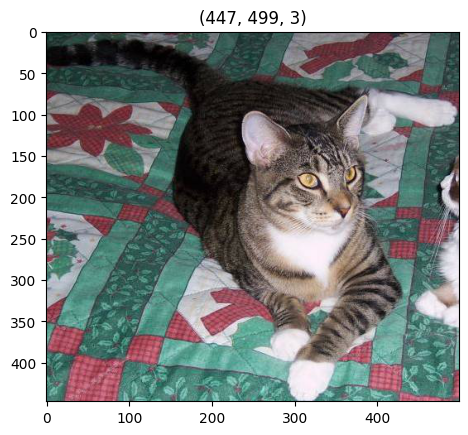

In [ ]:
#esimerkkikuva
dir_name=train_cats_dir
fnames=os.listdir(dir_name)
mk=len(fnames)
k=np.random.randint(mk)
fname=fnames[k]
fpath=os.path.join(dir_name,fname)
kuva=plt.imread(fpath)
print(np.max(kuva))
plt.imshow(kuva)
plt.title(kuva.shape)
plt.show()

Konvoluutioneuroverkko kuvien luokitteluun

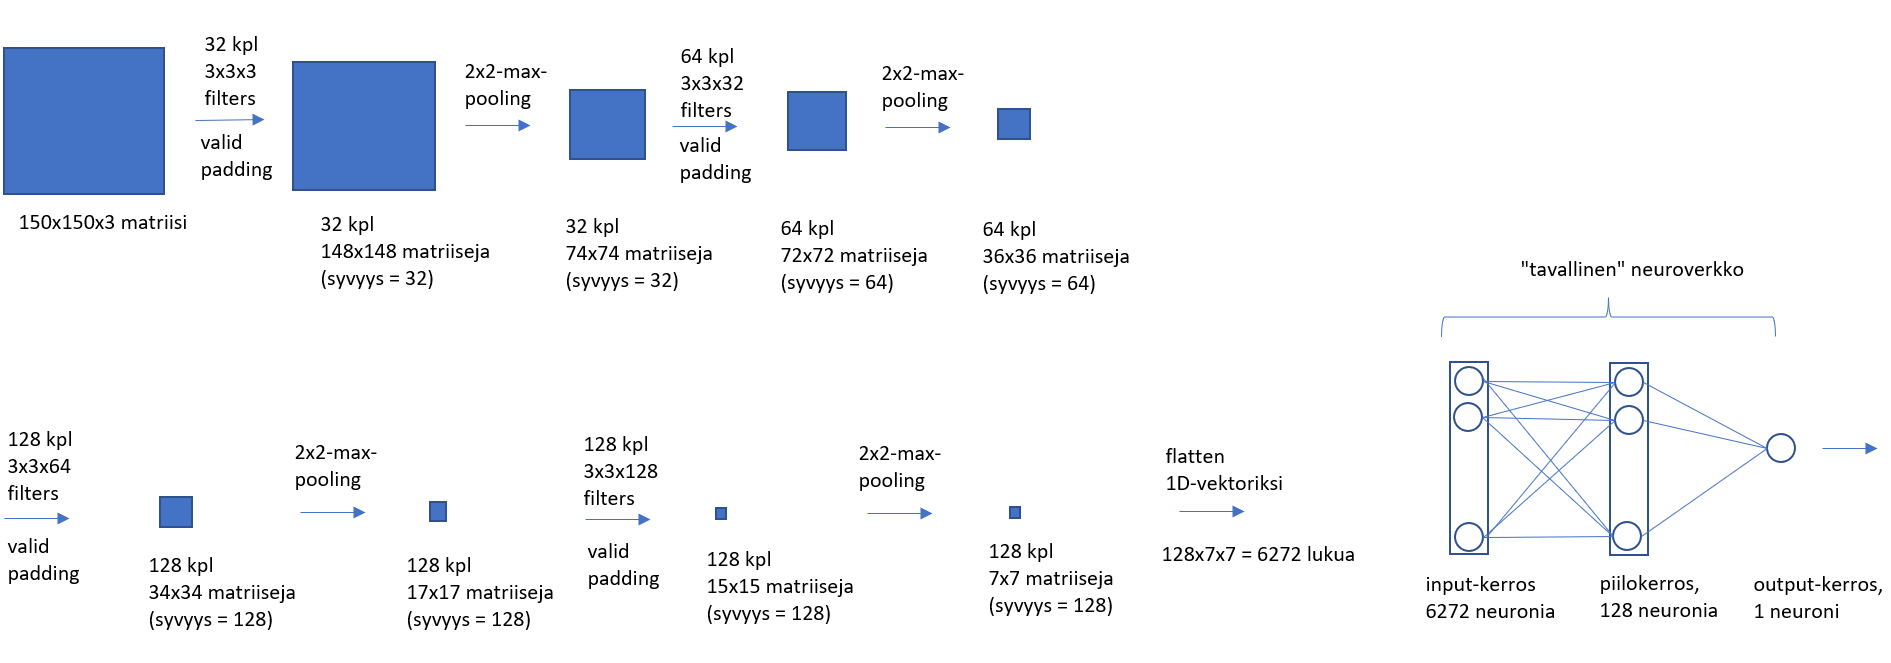

Luetaan kuvia kansioista halutun kokoisina nippuina ja muunnetaan ne kokoon (150,150,3) käyttäen apuvälinettä [image_dataset_from_directory](https://keras.io/api/data_loading/image/)

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

#kuvien koko
img_height=150
img_width=150
#nipun koko
batch_size=32

train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(img_height,img_width),
    batch_size=batch_size)

validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)


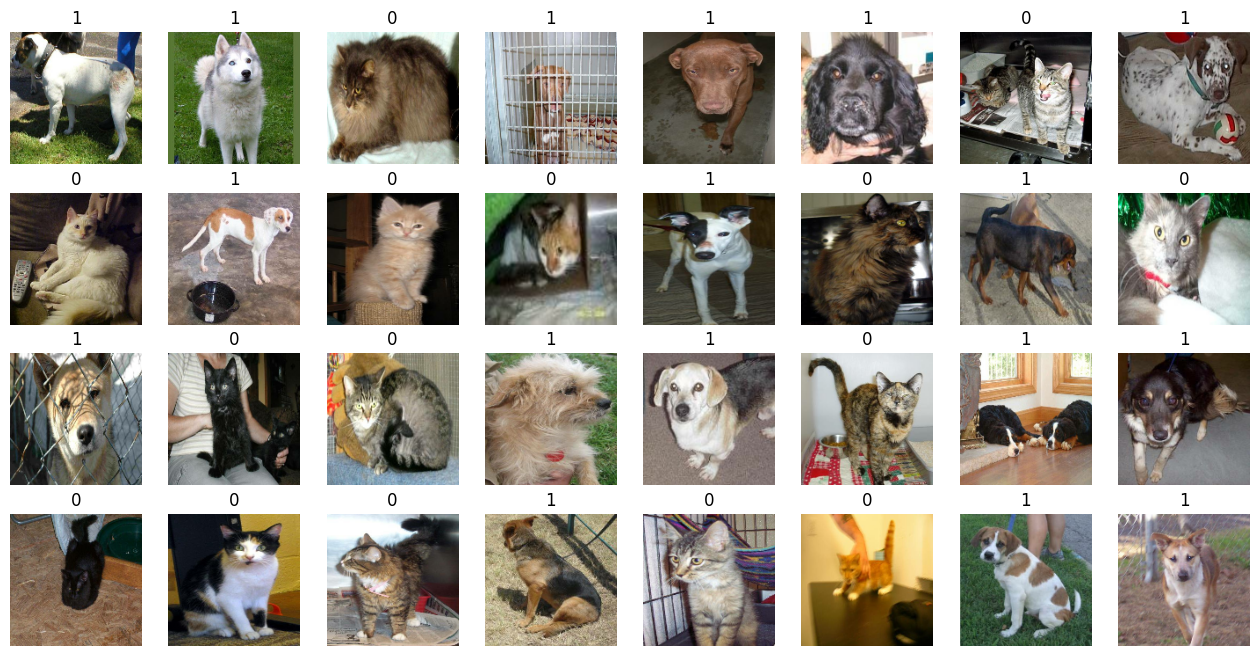

In [ ]:
#yksi nippu training-kuvia
for data_batch, labels_batch in train_dataset:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  plt.figure(figsize=(16,8))
  for k in range(batch_size):
    plt.subplot(4,8,k+1)
    plt.imshow(data_batch[k]/255.0) #pikseliarvot välille 0...1
    plt.axis('off')
    plt.title(int(labels_batch[k]))
  break

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Rescaling,Conv2D, MaxPooling2D, Flatten, Dropout, Dense

In [ ]:
model = Sequential()
model.add(Input(shape=(img_height,img_width,3)))
model.add(Rescaling(1/255.0)) #pikseliarvot välille 0...1
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                    

In [ ]:
from tensorflow.keras.optimizers import Adam 
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0005),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint   

callback = ModelCheckpoint(filepath='cats_and_dogs_v1.hdf5', 
                               monitor='val_accuracy', save_best_only=True,
                               verbose=1)

In [ ]:
history = model.fit(
      train_dataset,
      epochs=30,
      validation_data=validation_dataset,
      callbacks=[callback])

Epoch 1/30
63/63 [==============================] - ETA: 0s - loss: 0.6971 - accuracy: 0.5010
Epoch 1: val_accuracy improved from -inf to 0.54800, saving model to cats_and_dogs_v1.hdf5
63/63 [==============================] - 18s 70ms/step - loss: 0.6971 - accuracy: 0.5010 - val_loss: 0.6919 - val_accuracy: 0.5480
Epoch 2/30
63/63 [==============================] - ETA: 0s - loss: 0.6915 - accuracy: 0.5285
Epoch 2: val_accuracy improved from 0.54800 to 0.63600, saving model to cats_and_dogs_v1.hdf5
63/63 [==============================] - 4s 57ms/step - loss: 0.6915 - accuracy: 0.5285 - val_loss: 0.6876 - val_accuracy: 0.6360
Epoch 3/30
62/63 [============================>.] - ETA: 0s - loss: 0.6713 - accuracy: 0.5978
Epoch 3: val_accuracy did not improve from 0.63600
63/63 [==============================] - 4s 57ms/step - loss: 0.6713 - accuracy: 0.5975 - val_loss: 0.6633 - val_accuracy: 0.5880
Epoch 4/30
62/63 [============================>.] - ETA: 0s - loss: 0.6398 - accuracy: 0.62

In [ ]:
model.load_weights('cats_and_dogs_v1.hdf5')

print(model.evaluate(train_dataset))
print(model.evaluate(validation_dataset))

63/63 [==============================] - 2s 28ms/step - loss: 0.1244 - accuracy: 0.9565
[0.12442388385534286, 0.9564999938011169]
32/32 [==============================] - 1s 26ms/step - loss: 0.5988 - accuracy: 0.7860
[0.5987604856491089, 0.7860000133514404]


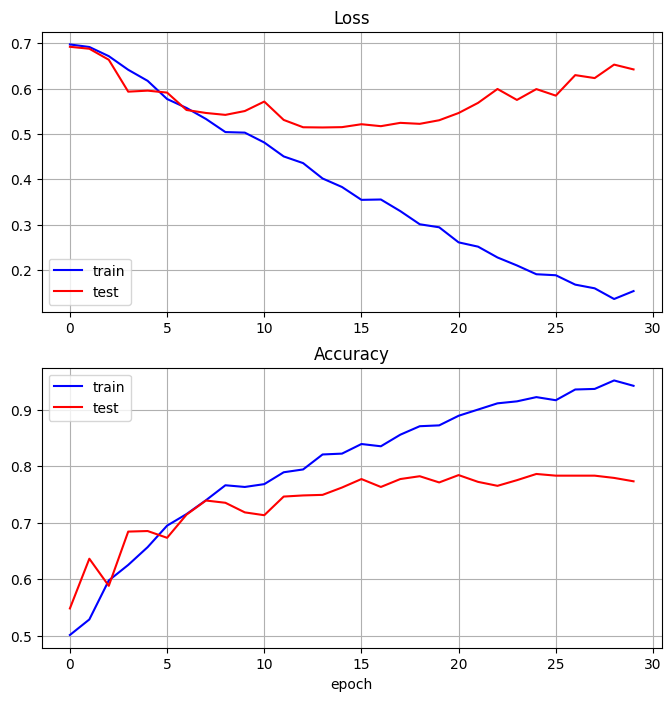

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.title('Loss')
plt.plot(history.history['loss'], color='b', label='train')
plt.plot(history.history['val_loss'], color='r', label='test')
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], color='b', label='train')
plt.plot(history.history['val_accuracy'], color='r', label='test')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.show()

Kuten ylläolevista kuvista nähdään, overfitting alkaa n.15 epochin jälkeen. Tämä ei ole yllättäväää, koska kertoimia on paljon ja training-kuvia vähän.

Laajennetaan training-datajoukkoa keinotekoisesti käyttäen [data-augmentaatio](https://keras.io/api/layers/preprocessing_layers/image_augmentation/)ta:

 tehdään training-kuville satunnaisia geometrisia muunnoksia, jolloin neuroverkko ei näe samaa training-kuvaa kahdesti vaan sen  muunneltuja versioita. 

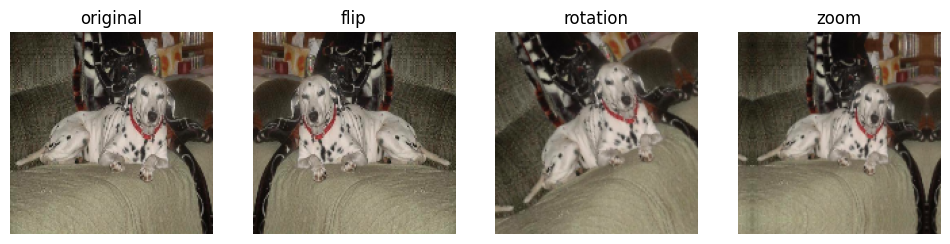

In [ ]:
from tensorflow.keras.layers import RandomFlip, RandomRotation,RandomZoom
flip=RandomFlip('horizontal') #peilataan (50 %:n todennäköisyydellä) vasen/oikea-suunnassa 
rotate=RandomRotation(0.1) #kierretään satunnaisen kulman -0.1...0.1 *360 astetta verran 
zoom=RandomZoom(0.3) #zoomataan satunnaisella kertoimella -0.3...0.3


for data_batch, labels_batch in train_dataset:
  kuva=data_batch[0]/255.0 #pikseliarvot välille 0...1
  flipped=flip(kuva)
  rotated=rotate(kuva)
  zoomed=zoom(kuva)

  
  plt.figure(figsize=(12,3))  
  plt.subplot(1,4,1)
  plt.imshow(kuva)
  plt.axis('off')
  plt.title('original')
  plt.subplot(1,4,2)
  plt.imshow(flipped) 
  plt.axis('off')
  plt.title('flip')
  plt.subplot(1,4,3)
  plt.imshow(rotated) 
  plt.axis('off')
  plt.title('rotation')
  plt.subplot(1,4,4)
  plt.imshow(zoomed) 
  plt.axis('off')
  plt.title('zoom')
  break
  

In [ ]:
#data-augmentaation suorittava kerros

Data_augmentation = Sequential([
        RandomFlip("horizontal"),
        RandomRotation(0.1),
        RandomZoom(0.2)])

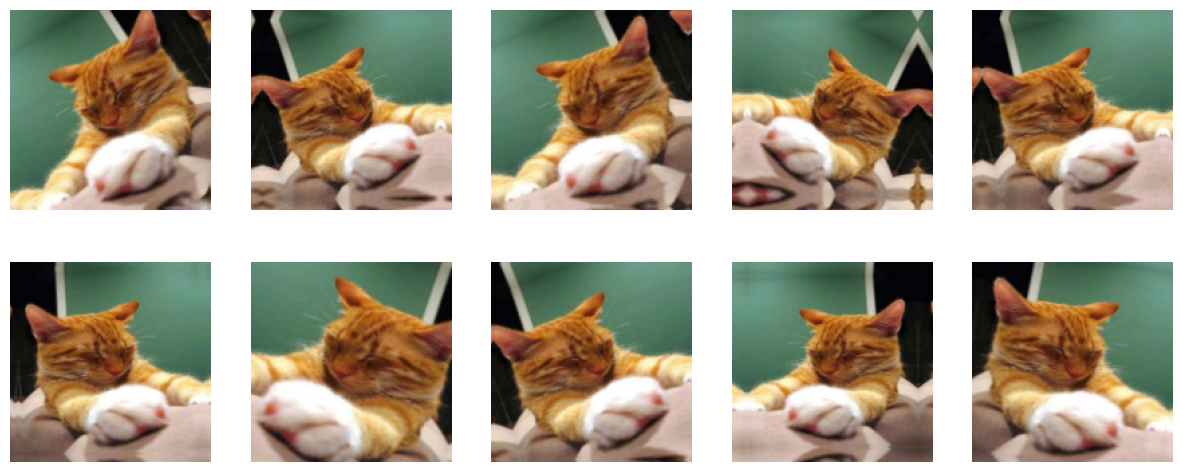

In [ ]:
#10 satunnaista muunnosta esimerkkikuvalle
plt.figure(figsize=(15,6))
for images, labels in train_dataset:
    for i in range(10):
        augmented_images = Data_augmentation(images)
        plt.subplot(2,5,i+1)
        plt.imshow(augmented_images[0]/255.0)
        plt.axis("off")
    break    

In [ ]:
#muodostetaan konvoluutioneuroverkko data_augmentaatiolla
model = Sequential()
model.add(Input(shape=(img_height,img_width,3)))
model.add(Data_augmentation)
model.add(Rescaling(1/255.0))
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 rescaling_3 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                 

In [ ]:
from tensorflow.keras.optimizers import Adam 
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0005),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint   

callback = ModelCheckpoint(filepath='cats_and_dogs_v2.hdf5', 
                               monitor='val_accuracy', save_best_only=True,
                               verbose=1)

In [ ]:
history = model.fit(
      train_dataset,
      epochs=100,
      validation_data=validation_dataset,
      callbacks=[callback])

Epoch 1/100
62/63 [============================>.] - ETA: 0s - loss: 0.6975 - accuracy: 0.4914
Epoch 1: val_accuracy improved from -inf to 0.50800, saving model to cats_and_dogs_v2.hdf5
63/63 [==============================] - 9s 81ms/step - loss: 0.6974 - accuracy: 0.4915 - val_loss: 0.6927 - val_accuracy: 0.5080
Epoch 2/100
61/63 [============================>.] - ETA: 0s - loss: 0.6923 - accuracy: 0.5200
Epoch 2: val_accuracy improved from 0.50800 to 0.57800, saving model to cats_and_dogs_v2.hdf5
63/63 [==============================] - 4s 57ms/step - loss: 0.6926 - accuracy: 0.5190 - val_loss: 0.6850 - val_accuracy: 0.5780
Epoch 3/100
62/63 [============================>.] - ETA: 0s - loss: 0.6907 - accuracy: 0.5494
Epoch 3: val_accuracy improved from 0.57800 to 0.64400, saving model to cats_and_dogs_v2.hdf5
63/63 [==============================] - 4s 58ms/step - loss: 0.6908 - accuracy: 0.5485 - val_loss: 0.6812 - val_accuracy: 0.6440
Epoch 4/100
62/63 [===========================

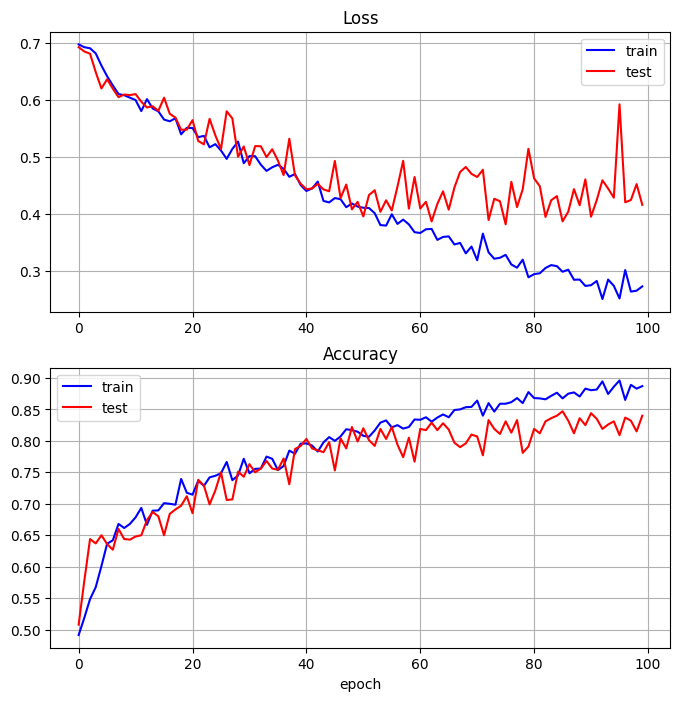

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.title('Loss')
plt.plot(history.history['loss'], color='b', label='train')
plt.plot(history.history['val_loss'], color='r', label='test')
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], color='b', label='train')
plt.plot(history.history['val_accuracy'], color='r', label='test')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.show()

In [ ]:
model.load_weights('cats_and_dogs_v2.hdf5')

print(model.evaluate(train_dataset))
print(model.evaluate(validation_dataset))

63/63 [==============================] - 2s 31ms/step - loss: 0.2163 - accuracy: 0.9095
[0.21628338098526, 0.909500002861023]
32/32 [==============================] - 1s 28ms/step - loss: 0.3872 - accuracy: 0.8470
[0.38717690110206604, 0.847000002861023]


In [ ]:
#kiinnitä drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#ja tallenna malli
model.save('/content/drive/My Drive/cats_and_dogs_cnn.h5')

In [ ]:
#lataa malli myöhemmin
from tensorflow.keras.models import load_model
model=load_model('/content/drive/My Drive/cats_and_dogs_cnn.h5')

[[0.999995]]


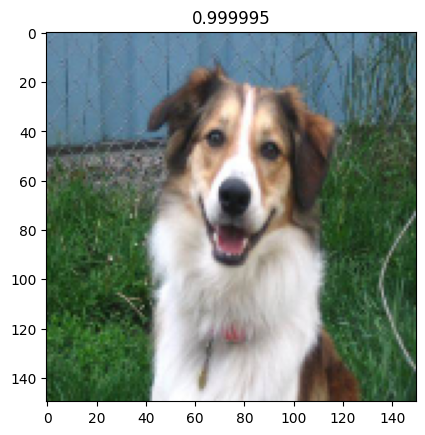

In [ ]:
#mallin ennuste esimerkkikuvalle
import cv2
dir_name=validation_dogs_dir
#dir_name=validation_cats_dir
fnames=os.listdir(dir_name)
mdir=len(fnames)
k=np.random.randint(mdir)
fname=fnames[k]
fpath = os.path.join(dir_name,fname)
kuva = plt.imread(fpath)
kuva = cv2.resize(kuva,(img_height,img_width)) #kokoon (150,150,3)
pred=model.predict(np.expand_dims(kuva,axis=0),verbose=0) #expand_dims-> kokoon (1,150,150,3)
print(pred)
plt.imshow(kuva)
plt.title(pred[0,0])
plt.show()

Visualisoidaan esimerkkikuvan tuottamia aktivaatioita konvoluutiokerroksissa:

In [ ]:
#verkon kerrokset
model.layers

In [ ]:
#poimitaan konvoluutiokerrokset
from tensorflow.keras import layers
layer_outputs=[]
for k in [2,4,6,8]:
  layer_outputs.append(model.layers[k].output)
activation_model = tensorflow.keras.Model(inputs=model.input, outputs=layer_outputs)       

In [ ]:
#esimerkkikuvan tuottamat aktivaatiot 
activations=activation_model.predict(np.expand_dims(kuva,axis=0))

1/1 [==============================] - 0s 101ms/step


In [ ]:
activations[0].shape

(1, 148, 148, 32)

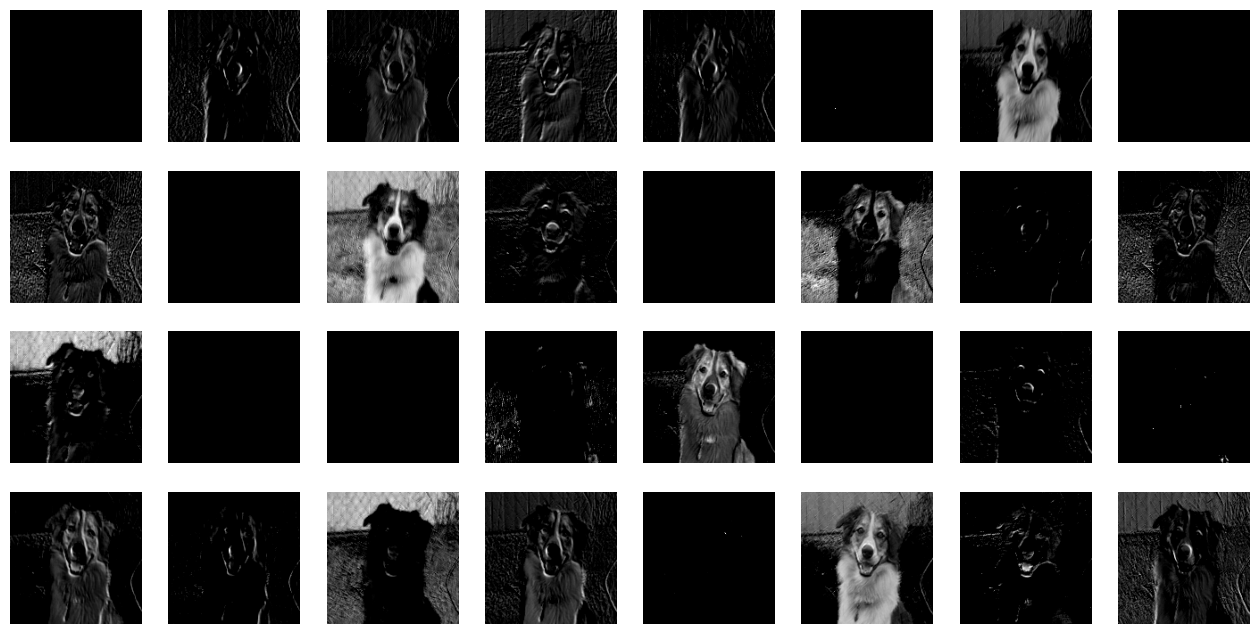

In [ ]:
plt.figure(figsize=(16,8))
for k in range(32):
  plt.subplot(4,8,k+1)
  plt.imshow(activations[0][0,:,:,k],cmap='gray')
  plt.axis('off')
plt.show()

In [ ]:
activations[1].shape

(1, 72, 72, 64)

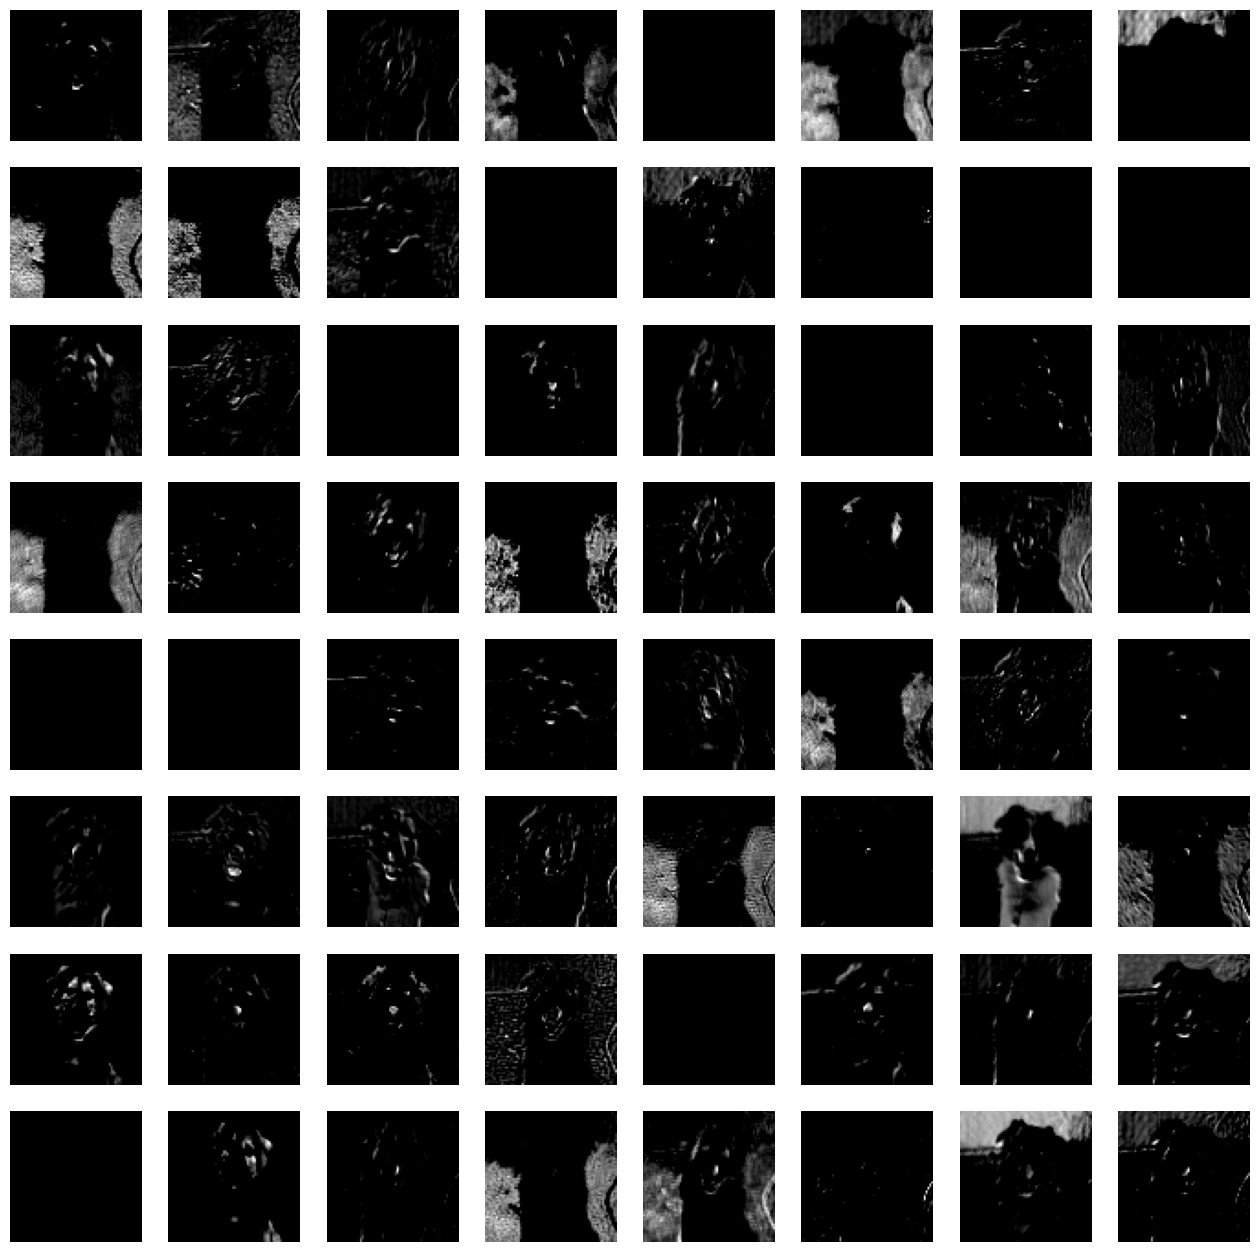

In [ ]:
plt.figure(figsize=(16,16))
for k in range(64):
  plt.subplot(8,8,k+1)
  plt.imshow(activations[1][0,:,:,k],cmap='gray')
  plt.axis('off')
plt.show()

In [ ]:
activations[2].shape

(1, 34, 34, 128)

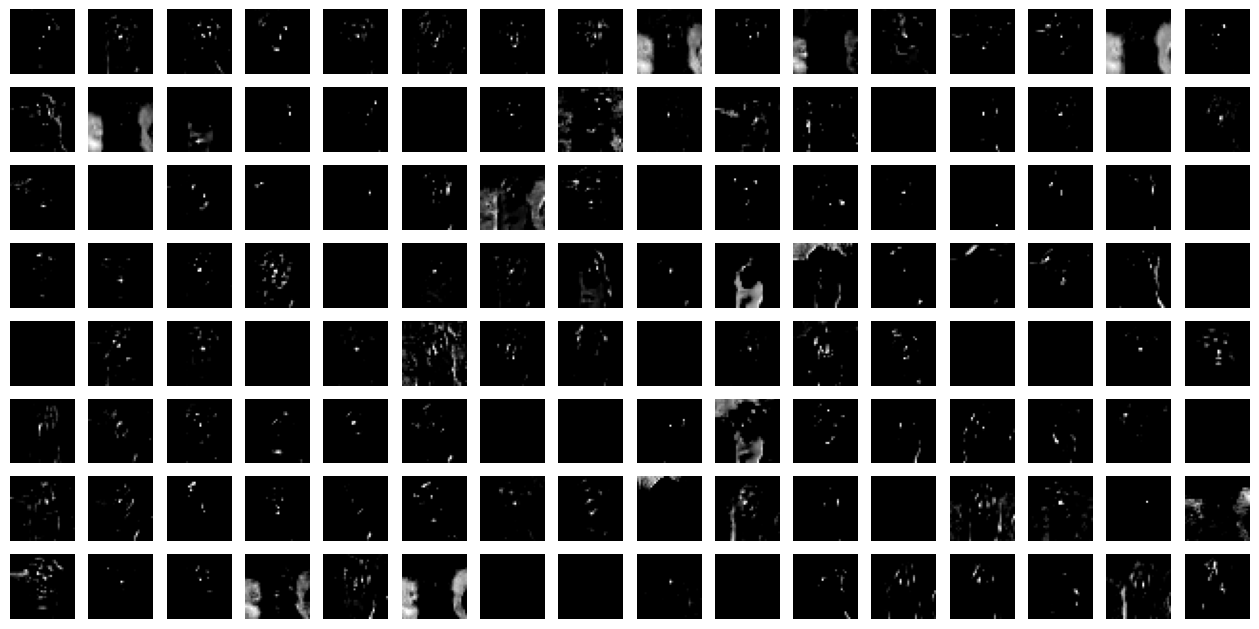

In [ ]:
plt.figure(figsize=(16,16))
for k in range(128):
  plt.subplot(16,16,k+1)
  plt.imshow(activations[2][0,:,:,k],cmap='gray')
  plt.axis('off')
plt.show()

In [ ]:
activations[3].shape

(1, 15, 15, 128)

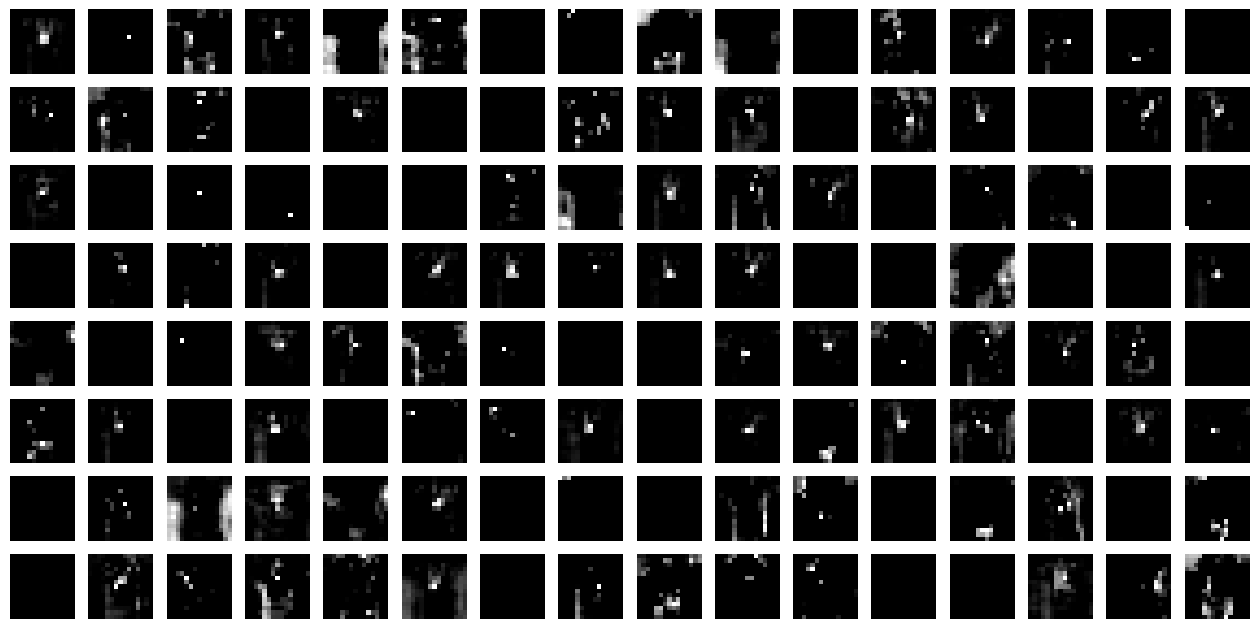

In [ ]:
plt.figure(figsize=(16,16))
for k in range(128):
  plt.subplot(16,16,k+1)
  plt.imshow(activations[3][0,:,:,k],cmap='gray')
  plt.axis('off')
plt.show()

**Pretrained convnet**

Käytetään apuna suurta, esikoulutettua konvoluutioneuroverkkoa (pretrained convnet) [VGG16](https://medium.com/@mygreatlearning/everything-you-need-to-know-about-vgg16-7315defb5918).

VGG16 sisältää 13 konvoluutio-, 5 max-pool ja 3 tiheää kerrosta, eli 16 kerrosta, joissa on kertoimia (yhteensä n. 140 miljoonaa)

Se on koulutettu tunnistamaan 1000 erilaista luokkaa (mm. eri kissa- ja koirarotuja) käyttäen  [ImageNet-datajoukon](https://www.image-net.org/) 1.3 miljoonaa kuvaa. 

 



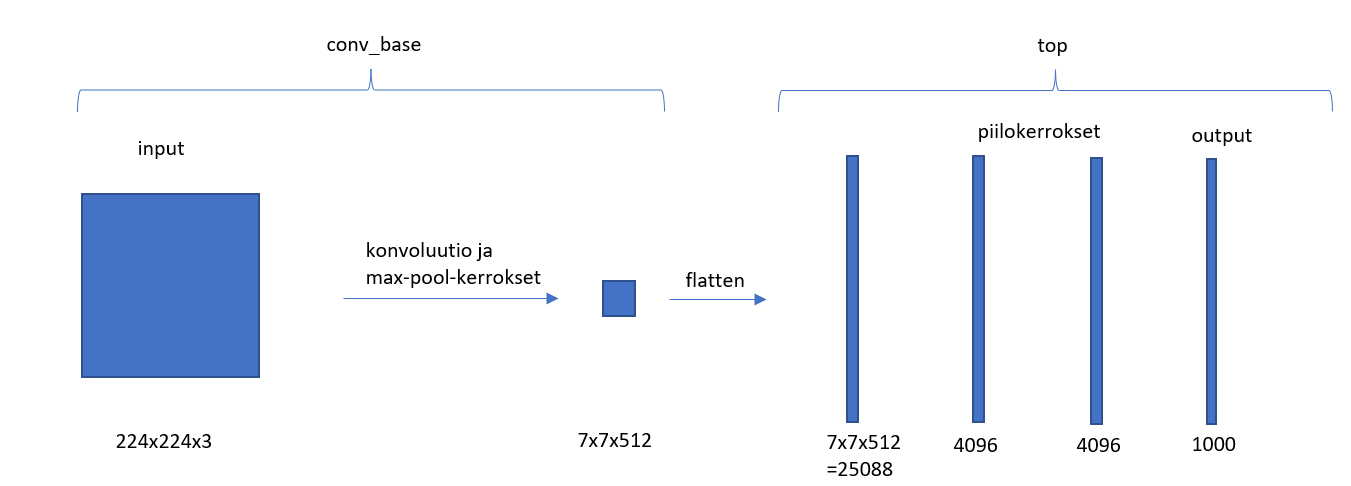

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
model = VGG16(include_top=True,weights='imagenet')

553467096/553467096 [==============================] - 16s 0us/step


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

#preprocessing = subtract the mean RGB value, computed on the training set, from each pixel.

35363/35363 [==============================] - 0s 0us/step
(1, 1000)
[('Egyptian_cat', 0.43679065), ('lynx', 0.23510854), ('tiger_cat', 0.099863686), ('tabby', 0.09696638), ('tiger', 0.021455264)]


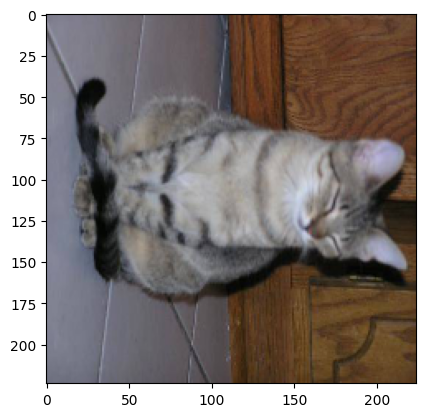

In [ ]:
#VGG16:sta ennuste esimerkkikuvalle
import cv2
dir_name=validation_cats_dir
fnames=os.listdir(dir_name)
N=len(fnames)
k=np.random.randint(N)
fpath = os.path.join(dir_name,fnames[k])
kuva = plt.imread(fpath)
kuva = cv2.resize(kuva,(224,224)) #(224,224,3)
kuva = np.expand_dims(kuva, axis=0) #(1,224,224,3)
kuva_pp = preprocess_input(kuva)
pred=model.predict(kuva_pp)
label = decode_predictions(pred)
label = label[0]
label=[(y,z) for (x,y,z) in label]
print(pred.shape)
print(label[:5]) #5 suurinta todennäköisyyttä
plt.imshow(kuva[0])
plt.show()

**Feature extraction:**

Lasketaan kissa-koira-kuvien ulostulot VGG16:sta konvoluutiokerroksista (conv_base), käytetään näin saatuja 25088 lukua kuvan koordinaatteina (extracted features), ja etsitään yhden piilokerroksen tiheän neuroverkon kertoimet training-kuvien koordinaattien avulla.





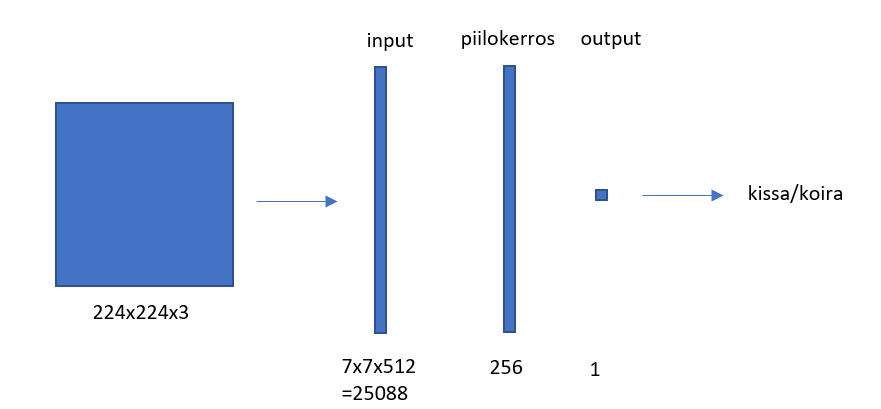

In [ ]:
conv_base = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3))
conv_base.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
#luetaan kuvia kansioista kokoon 224
from tensorflow.keras.utils import image_dataset_from_directory

#kuvien koko
img_height=224
img_width=224
#nipun koko
batch_size=20

train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(img_height,img_width),
    batch_size=batch_size)

validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
#lasketaan training- ja testikuvien koordinaatit VGG16:sta konvoluutiokerroksista
train_features=np.zeros((2000,7*7*512))
train_labels=np.zeros(2000)
test_features=np.zeros((1000,7*7*512))
test_labels=np.zeros(1000)
i=0
for images,labels in train_dataset:
  preprocessed_images = preprocess_input(images)
  features = conv_base.predict(preprocessed_images,verbose=0)
  train_features[i*batch_size:(i+1)*batch_size,:]=features.reshape((batch_size,7*7*512))
  train_labels[i*batch_size:(i+1)*batch_size]=labels
  i+=1
  if i==100: #100*20=2000 training-kuvaa
    break

i=0    
for images,labels in validation_dataset:
  preprocessed_images = preprocess_input(images)
  features = conv_base.predict(preprocessed_images,verbose=0)
  test_features[i*batch_size:(i+1)*batch_size,:]=features.reshape((batch_size,7*7*512))
  test_labels[i*batch_size:(i+1)*batch_size]=labels
  i+=1 
  if i==50: #50*20=1000 testi-kuvaa
    break
   

In [ ]:
#yhden piilokerroksen tiheä neuroverkko
model = Sequential()
model.add(Input(shape=(25088)))
model.add(Dropout(rate=0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 6,423,041
Trainable params: 6,423,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam 
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0005),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint   

callback = ModelCheckpoint(filepath='cats_and_dogs_v2.hdf5', 
                               monitor='val_accuracy', save_best_only=True,
                               verbose=1)

In [ ]:
history = model.fit(
      train_features,train_labels,
      batch_size=50,
      epochs=100,
      validation_data=(test_features,test_labels),
      callbacks=[callback])

Epoch 1/100
36/40 [==========================>...] - ETA: 0s - loss: 1.8211 - accuracy: 0.9283
Epoch 1: val_accuracy improved from -inf to 0.96900, saving model to cats_and_dogs_v2.hdf5
40/40 [==============================] - 4s 33ms/step - loss: 1.7898 - accuracy: 0.9300 - val_loss: 0.6589 - val_accuracy: 0.9690
Epoch 2/100
35/40 [=========================>....] - ETA: 0s - loss: 0.5169 - accuracy: 0.9720
Epoch 2: val_accuracy improved from 0.96900 to 0.97800, saving model to cats_and_dogs_v2.hdf5
40/40 [==============================] - 1s 22ms/step - loss: 0.5072 - accuracy: 0.9730 - val_loss: 0.4145 - val_accuracy: 0.9780
Epoch 3/100
32/40 [=======================>......] - ETA: 0s - loss: 0.2846 - accuracy: 0.9862
Epoch 3: val_accuracy did not improve from 0.97800
40/40 [==============================] - 0s 11ms/step - loss: 0.2874 - accuracy: 0.9865 - val_loss: 0.4275 - val_accuracy: 0.9750
Epoch 4/100
37/40 [==========================>...] - ETA: 0s - loss: 0.2317 - accuracy: 0

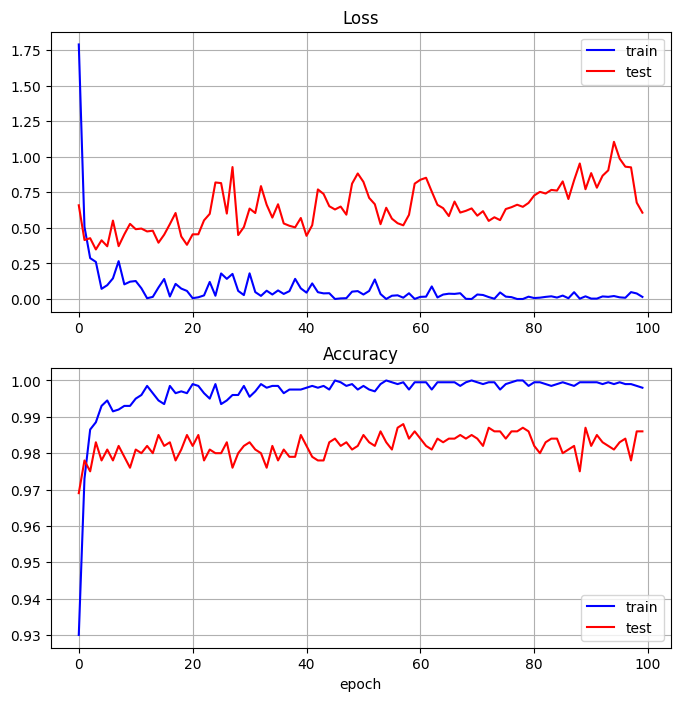

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.title('Loss')
plt.plot(history.history['loss'], color='b', label='train')
plt.plot(history.history['val_loss'], color='r', label='test')
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], color='b', label='train')
plt.plot(history.history['val_accuracy'], color='r', label='test')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.show()

In [ ]:
model.load_weights('cats_and_dogs_v2.hdf5')

print(model.evaluate(train_features,train_labels))
print(model.evaluate(test_features,test_labels))

63/63 [==============================] - 0s 5ms/step - loss: 5.5019e-16 - accuracy: 1.0000
[5.501918390758069e-16, 1.0]
32/32 [==============================] - 0s 5ms/step - loss: 0.5181 - accuracy: 0.9880
[0.5181007981300354, 0.9879999756813049]


In [ ]:
#kiinnitä drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#ja tallenna malli
model.save('/content/drive/My Drive/cats_and_dogs_VGG16.h5')

In [ ]:
#lataa malli myöhemmin
from tensorflow.keras.models import load_model
model=load_model('/content/drive/My Drive/cats_and_dogs_VGG16.h5')

[[0.]]


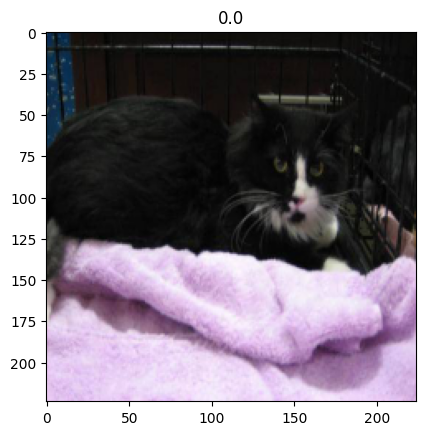

In [ ]:
#mallin ennuste esimerkkikuvalle
import cv2
dir_name=validation_dogs_dir
dir_name=validation_cats_dir
fnames=os.listdir(dir_name)
mdir=len(fnames)
k=np.random.randint(mdir)
fname=fnames[k]
fpath = os.path.join(dir_name,fname)
kuva = plt.imread(fpath)
kuva = cv2.resize(kuva,(224,224)) #kokoon (224,224,3)
preprocessed_kuva = preprocess_input(kuva)
features = conv_base.predict(np.expand_dims(preprocessed_kuva,axis=0),verbose=0).reshape((1,25088))
apred=model.predict(features,verbose=0)
print(apred)
plt.imshow(kuva)
plt.title(apred[0,0])
plt.show()


In [ ]:
atest_pred=model.predict(test_features) #ennustetut todennäköisyydet

32/32 [==============================] - 0s 3ms/step


In [ ]:
test_labels_pred=np.zeros(1000)
test_labels_pred[atest_pred[:,0]>0.5]=1 #ennustetut luokat

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels,test_labels_pred)

array([[496,   4],
       [  8, 492]])

In [ ]:
#etsitään väärin ennustetut testikuvat
dir = validation_cats_dir
fnames=os.listdir(dir)
vaarin=[] #lista, johon kerätään tiedostonimet
tn_vaarin=[] #lista, johon kerätään ennustetut todennäköisyydet
for fname in fnames:
  path=dir+'/'+fname
  kuva=plt.imread(path)
  kuvars=cv2.resize(kuva,(224,224))
  preprocessed_images = preprocess_input(kuvars.reshape((1,224,224,3)))
  features = conv_base.predict(preprocessed_images,verbose=0)
  at=model.predict(features.reshape(1,7*7*512),verbose=0)[0,0]
  if at>0.5:
    vaarin.append(fname)
    tn_vaarin.append(at)

dir = validation_dogs_dir
fnames=os.listdir(dir)
for fname in fnames:
  path=dir+'/'+fname
  kuva=plt.imread(path)
  kuvars=cv2.resize(kuva,(224,224))
  preprocessed_images = preprocess_input(kuvars.reshape((1,224,224,3)))
  features = conv_base.predict(preprocessed_images,verbose=0)
  at=model.predict(features.reshape(1,7*7*512),verbose=0)[0,0]
  if at<=0.5:
    vaarin.append(fname)
    tn_vaarin.append(at)


In [ ]:
vaarin

['cat.2422.jpg',
 'cat.2366.jpg',
 'cat.2391.jpg',
 'cat.2415.jpg',
 'dog.2422.jpg',
 'dog.2478.jpg',
 'dog.2339.jpg',
 'dog.2408.jpg',
 'dog.2476.jpg',
 'dog.2397.jpg',
 'dog.2264.jpg',
 'dog.2018.jpg',
 'dog.2271.jpg']

In [ ]:
tn_vaarin

[1.0,
 1.0,
 1.0,
 0.70086974,
 5.432385e-24,
 0.0072864518,
 2.678137e-25,
 6.594944e-22,
 0.0019451993,
 8.81817e-24,
 1.0905255e-20,
 9.508395e-21,
 1.8583682e-35]

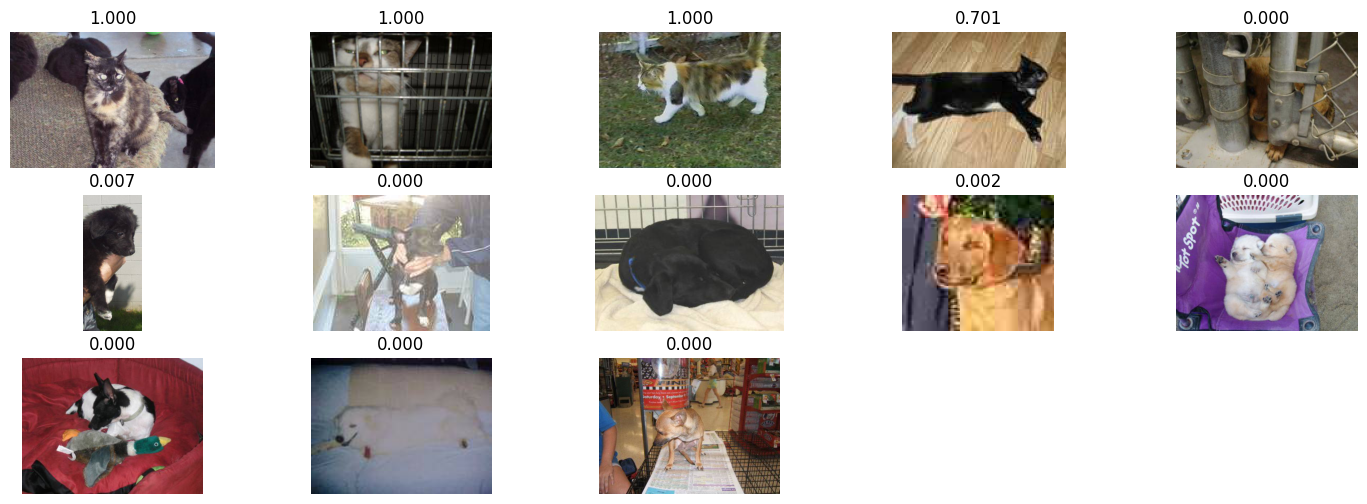

In [ ]:
plt.figure(figsize=(18,6))
k=1
for fname in vaarin:
  if fname[0]=='c':
    dir = validation_cats_dir
  else:
    dir = validation_dogs_dir
  path=dir+'/'+fname
  kuva=plt.imread(path)
  plt.subplot(3,5,k)
  plt.imshow(kuva)
  plt.axis('off')
  plt.title('{:.3f}'.format(tn_vaarin[k-1]))
  k+=1
plt.show()     



**Feature extraction + Data augmentation**

Etsitään yhden piilokerroksen tiheän neuroverkon kertoimet käyttäen data-augmentaatiota training-kuville. VGG16:sta konvoluutiokerrosten kertoimet "jäädytetään" eli niitä ei päivitetä. 

In [ ]:
#jäädytetään VGG16:sta konvoluutiokerrosten kertoimet 
conv_base.trainable=False

In [ ]:
from tensorflow.keras.layers import Lambda 
model=Sequential()
model.add(Input(shape=(224,224,3)))
model.add(Data_augmentation)
model.add(Lambda(preprocess_input))
model.add(conv_base)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout_6 (Dropout)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_7 (Dropout)         (None, 256)              

In [ ]:
from tensorflow.keras.optimizers import Adam 
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint   

callback = ModelCheckpoint(filepath='cats_and_dogs_VGG16_v2.hdf5', 
                               monitor='val_accuracy', save_best_only=True,
                               verbose=1)

In [ ]:
history = model.fit(
      train_dataset,
      epochs=30,
      validation_data=validation_dataset,
      callbacks=[callback])

Epoch 1/30
100/100 [==============================] - ETA: 0s - loss: 4.5771 - accuracy: 0.8635
Epoch 1: val_accuracy improved from -inf to 0.96700, saving model to cats_and_dogs_VGG16_v2.hdf5
100/100 [==============================] - 21s 180ms/step - loss: 4.5771 - accuracy: 0.8635 - val_loss: 0.3685 - val_accuracy: 0.9670
Epoch 2/30
100/100 [==============================] - ETA: 0s - loss: 1.0021 - accuracy: 0.9075
Epoch 2: val_accuracy improved from 0.96700 to 0.98300, saving model to cats_and_dogs_VGG16_v2.hdf5
100/100 [==============================] - 19s 182ms/step - loss: 1.0021 - accuracy: 0.9075 - val_loss: 0.1088 - val_accuracy: 0.9830
Epoch 3/30
100/100 [==============================] - ETA: 0s - loss: 0.4397 - accuracy: 0.9275
Epoch 3: val_accuracy did not improve from 0.98300
100/100 [==============================] - 17s 173ms/step - loss: 0.4397 - accuracy: 0.9275 - val_loss: 0.0526 - val_accuracy: 0.9820
Epoch 4/30
100/100 [==============================] - ETA: 0s 

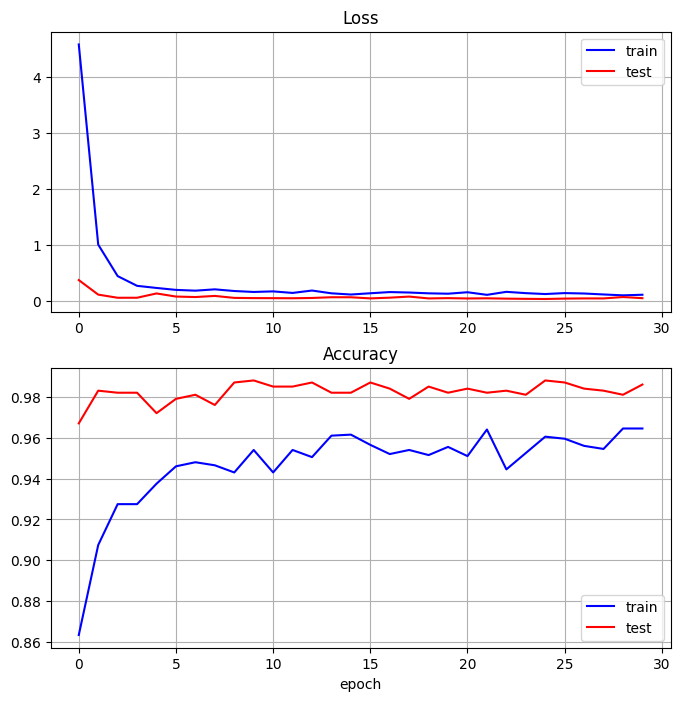

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.title('Loss')
plt.plot(history.history['loss'], color='b', label='train')
plt.plot(history.history['val_loss'], color='r', label='test')
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], color='b', label='train')
plt.plot(history.history['val_accuracy'], color='r', label='test')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.show()

In [ ]:
model.load_weights('cats_and_dogs_VGG16_v2.hdf5')

print(model.evaluate(train_dataset))
print(model.evaluate(validation_dataset))

100/100 [==============================] - 11s 111ms/step - loss: 0.0215 - accuracy: 0.9915
[0.02148730307817459, 0.9915000200271606]
50/50 [==============================] - 6s 113ms/step - loss: 0.0465 - accuracy: 0.9880
[0.04654848203063011, 0.9879999756813049]


In [ ]:
#ja tallenna malli
model.save('/content/drive/My Drive/cats_and_dogs_VGG16_v2.h5')

In [ ]:
#lataa malli myöhemmin
from tensorflow.keras.models import load_model
model=load_model('/content/drive/My Drive/cats_and_dogs_VGG16_v2.h5')